<a href="https://colab.research.google.com/github/chinmaylab/Foster-Care-Homes-Analysis/blob/main/Fostercareanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CIL R2

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Importing Data

In [99]:
path = '/content/drive/MyDrive/CIL R2/R2 Data Copy.xlsx'

incidence = pd.read_excel(path, sheet_name='LAC incidence', skiprows=2, index_col=None)
parents = pd.read_excel(path, sheet_name='Births by parent relationship', skiprows=4, index_col=None)
mothersage = pd.read_excel(path, sheet_name='Births by age of mother', skiprows=3, index_col=None)
deprivation = pd.read_excel(path, sheet_name='Deprivation & household income', skiprows=2, index_col=None)
bme = pd.read_excel(path, sheet_name='% BME', skiprows=2, index_col=None)
regions = pd.read_excel(path, sheet_name='LA to region', skiprows=2, usecols="A:E")
forecast = pd.read_excel(path, sheet_name='Forecasts', skiprows=3, usecols="B:F")

## Checking Imported Data

In [100]:
incidence.drop(columns = ['Unnamed: 0'], inplace = True)
incidence.head(5)

LA Code                 LA Name  # looked after children  \
0  E06000053         ISLES OF SCILLY                        0   
1  E09000001          CITY OF LONDON                        9   
2  E06000017                 RUTLAND                       32   
3  E09000020  KENSINGTON AND CHELSEA                      105   
4  E09000021    KINGSTON UPON THAMES                      111   

   Estimated Under 18's Population  
0                              359  
1                              591  
2                             7974  
3                            22594  
4                            36460

In [101]:
parents.drop(columns = ['Unnamed: 0'], inplace = True)
parents.head(5)

LA Code                          LA Name  Total in marriage  \
0  K04000001, J99000001     ENGLAND, WALES AND ELSEWHERE             364521   
1             K02000001                   UNITED KINGDOM             404890   
2             J99000001  USUAL RESIDENCE OUTSIDE ENGLAND                122   
3             E92000001                          ENGLAND             350979   
4             E09000033                      WESTMINSTER               1930   

   Total outside marriage  Joint registrations same address  \
0                  331750                            223711   
1                  369945                            247222   
2                      56                                39   
3                  312178                            210483   
4                     724                               429   

   Joint registrations different address  Sole registrations  
0                                  71917               36122  
1                                  83083               39640  
2                                      8                   9  
3                                  67546               34149  
4                                    194                 101

In [102]:
mothersage.drop(columns = ['Unnamed: 0'], inplace = True)
mothersage.head(5)

LA Code                             LA Name  All ages  Under 18  \
0  E92000001  ENGLAND                               663157      5025   
1  E09000033  Westminster                             2654         1   
2  E09000032  Wandsworth                              4860        18   
3  E09000031  Waltham Forest                          4700        20   
4  E09000030  Tower Hamlets                           4592         6   

   Under 20  20 to 24  40 to 44  45 and over  
0     20963     96519     26447         2207  
1        20       170       225           20  
2        50       269       361           26  
3        91       505       244           19  
4        63       448       211           20

In [103]:
deprivation.drop(columns = ['Unnamed: 0'], inplace = True)
deprivation.head(5)

LA Code               LA Name  GDHI Per Head (£)  IMD - Average score  \
0  E06000001            HARTLEPOOL              16934            34.853121   
1  E06000002         MIDDLESBROUGH              16222            40.443116   
2  E06000003  REDCAR AND CLEVELAND              17128            29.841330   
3  E06000004      STOCKTON-ON-TEES              17935            25.244108   
4  E06000005            DARLINGTON              18376            26.787000   

   IMD - Proportion of LSOAs in most deprived 10% nationally  
0                                             0.3793          
1                                             0.5000          
2                                             0.2614          
3                                             0.2167          
4                                             0.1846

In [104]:
bme.drop(columns = ['Unnamed: 0'], inplace = True)
bme.head(5)

AREA CODE       AREA NAME   %BME
0  E09000033     WESTMINSTER  0.447
1  E09000032      WANDSWORTH  0.321
2  E09000031  WALTHAM FOREST  0.470
3  E09000030   TOWER HAMLETS  0.608
4  E09000029          SUTTON  0.316

In [105]:
regions.drop(columns = ['Unnamed: 0'], inplace = True)
regions.head(5)

LA code               LA name Region code Region name
0  E09000001        City of London   E12000007      London
1  E09000002  Barking and Dagenham   E12000007      London
2  E09000003                Barnet   E12000007      London
3  E09000004                Bexley   E12000007      London
4  E09000005                 Brent   E12000007      London

### Pre-processing the Data

#### Checking for Null Values

In [106]:
incidence.isnull().sum()

LA Code                            0
LA Name                            0
# looked after children            0
Estimated Under 18's Population    0
dtype: int64

In [107]:
parents.isnull().sum()

LA Code                                  0
LA Name                                  0
Total in marriage                        0
Total outside marriage                   0
Joint registrations same address         0
Joint registrations different address    0
Sole registrations                       0
dtype: int64

In [108]:
mothersage.isnull().sum()

LA Code        0
LA Name        0
All ages       0
Under 18       0
Under 20       0
20 to 24       0
40 to 44       0
45 and over    0
dtype: int64

In [109]:
deprivation.isnull().sum()

LA Code                                                      0
LA Name                                                      0
GDHI Per Head (£)                                            0
IMD - Average score                                          0
IMD - Proportion of LSOAs in most deprived 10% nationally    0
dtype: int64

In [110]:
bme.isnull().sum()

AREA CODE    0
AREA NAME    0
%BME         0
dtype: int64

In [111]:
regions.isnull().sum()

LA code        0
LA name        0
Region code    0
Region name    0
dtype: int64

#### Checking Data Types

In [112]:
incidence.dtypes

LA Code                            object
LA Name                            object
# looked after children             int64
Estimated Under 18's Population     int64
dtype: object

In [113]:
parents.dtypes

LA Code                                  object
LA Name                                  object
Total in marriage                         int64
Total outside marriage                    int64
Joint registrations same address          int64
Joint registrations different address     int64
Sole registrations                        int64
dtype: object

In [114]:
mothersage.dtypes

LA Code        object
LA Name        object
All ages        int64
Under 18        int64
Under 20        int64
20 to 24        int64
40 to 44        int64
45 and over     int64
dtype: object

In [115]:
deprivation.dtypes

LA Code                                                       object
LA Name                                                       object
GDHI Per Head (£)                                              int64
IMD - Average score                                          float64
IMD - Proportion of LSOAs in most deprived 10% nationally    float64
dtype: object

In [116]:
bme.dtypes

AREA CODE     object
AREA NAME     object
%BME         float64
dtype: object

In [117]:
regions.dtypes

LA code        object
LA name        object
Region code    object
Region name    object
dtype: object

#### Checking for Duplicates

In [118]:
incidence.duplicated().sum()

0

In [119]:
parents.duplicated().sum()

0

In [120]:
mothersage.duplicated().sum()

0

In [121]:
deprivation.duplicated().sum()

0

In [122]:
bme.duplicated().sum()

0

In [123]:
regions.duplicated().sum()

0

### Exploratory Data Analysis

In [124]:
incidence.describe()

# looked after children  Estimated Under 18's Population
count               124.000000                       124.000000
mean                464.024194                     58840.645161
std                 309.237101                     32962.083838
min                   0.000000                       359.000000
25%                 307.750000                     39829.750000
50%                 402.000000                     56351.500000
75%                 566.000000                     69093.250000
max                2201.000000                    287947.000000

In [125]:
regions.head()

LA code               LA name Region code Region name
0  E09000001        City of London   E12000007      London
1  E09000002  Barking and Dagenham   E12000007      London
2  E09000003                Barnet   E12000007      London
3  E09000004                Bexley   E12000007      London
4  E09000005                 Brent   E12000007      London

In [126]:
## Adding % of looked after children

incidence["% looked after children"] = incidence["# looked after children"]/ incidence["Estimated Under 18's Population"]
incidence.head(5)

LA Code                 LA Name  # looked after children  \
0  E06000053         ISLES OF SCILLY                        0   
1  E09000001          CITY OF LONDON                        9   
2  E06000017                 RUTLAND                       32   
3  E09000020  KENSINGTON AND CHELSEA                      105   
4  E09000021    KINGSTON UPON THAMES                      111   

   Estimated Under 18's Population  % looked after children  
0                              359                 0.000000  
1                              591                 0.015228  
2                             7974                 0.004013  
3                            22594                 0.004647  
4                            36460                 0.003044

In [127]:
## Merging Regions Key with Incidence to get Regional Data

regionalincidence = pd.merge(incidence, regions, left_on = 'LA Code', right_on = 'LA code', how = 'left')
regionalincidence.drop(columns = 'LA code', inplace = True)
regionalincidence.head(5)

LA Code                 LA Name  # looked after children  \
0  E06000053         ISLES OF SCILLY                        0   
1  E09000001          CITY OF LONDON                        9   
2  E06000017                 RUTLAND                       32   
3  E09000020  KENSINGTON AND CHELSEA                      105   
4  E09000021    KINGSTON UPON THAMES                      111   

   Estimated Under 18's Population  % looked after children  \
0                              359                 0.000000   
1                              591                 0.015228   
2                             7974                 0.004013   
3                            22594                 0.004647   
4                            36460                 0.003044   

                  LA name Region code    Region name  
0         Isles of Scilly   E12000009     South West  
1          City of London   E12000007         London  
2                 Rutland   E12000004  East Midlands  
3  Kensington and Chelsea   E12000007         London  
4    Kingston upon Thames   E12000007         London

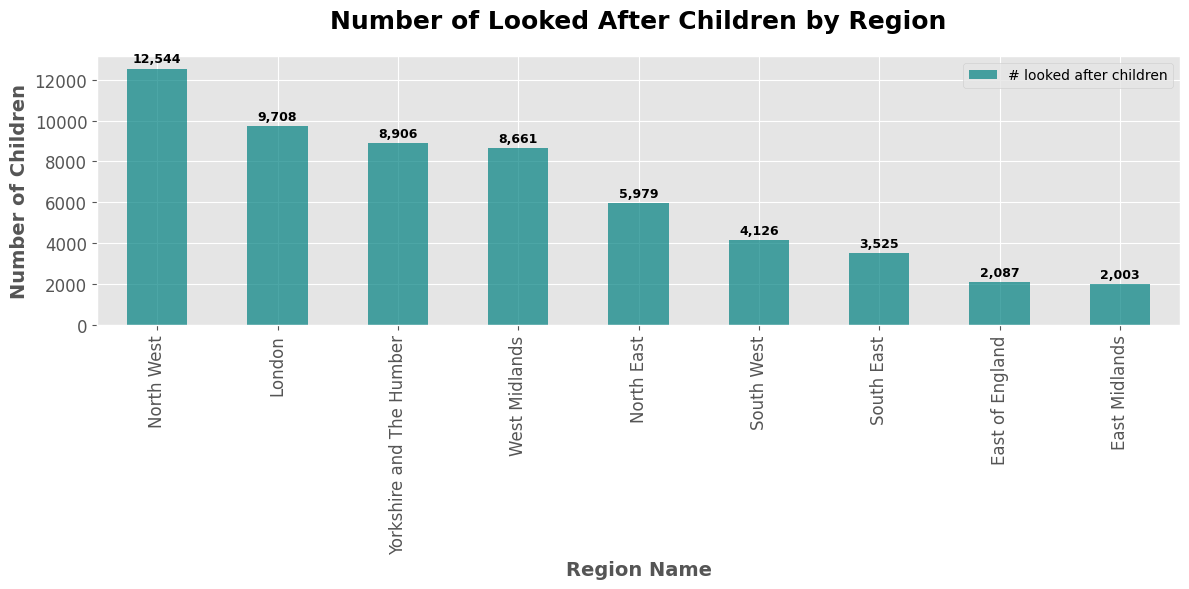

In [128]:
region_summary = regionalincidence.groupby('Region name')['# looked after children'].sum().sort_values(ascending=False).reset_index()

plt.style.use('ggplot')

region_summary.plot(x = 'Region name', y = '# looked after children', kind='bar', color='teal', alpha=0.7, figsize=(12, 6))

for idx, value in enumerate(region_summary['# looked after children']):
    plt.text(idx, value + 300, f'{int(value):,}', ha='center', fontsize=9, color='black', weight='bold')

plt.title('Number of Looked After Children by Region', fontsize=18, weight='bold', pad=20)
plt.xlabel('Region Name', fontsize=14, weight='bold')
plt.ylabel('Number of Children', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

In [129]:
## Importing Geo Spatial Boundaries Data from Open Source Library on GOV.UK

geojson_path = "/content/drive/MyDrive/CIL R2/Regions_December_2020_EN_BFC_2022_-7072422748717229793.geojson"
england_regions = gpd.read_file(geojson_path)
england_regions = england_regions.rename(columns={"RGN20NM": "Region name"})

merged = england_regions.merge(region_summary, on="Region name")

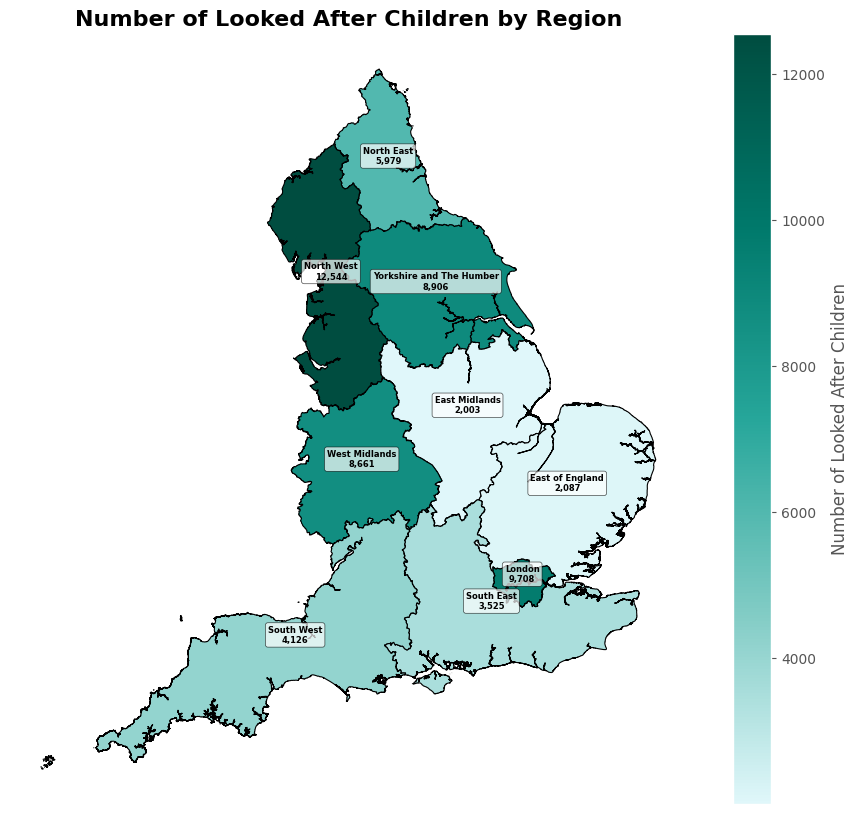

In [130]:
colors = ["#E0F7FA", "#80CBC4", "#26A69A", "#00796B", "#004D40"]
teal_cmap = LinearSegmentedColormap.from_list("custom_teal", colors)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = merged.plot(column="# looked after children",cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "Number of Looked After Children"},ax=ax)

ax.set_title("Number of Looked After Children by Region", fontsize=16, weight="bold")
ax.axis("off")

for _, row in merged.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['# looked after children']:,}",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

In [131]:
## Split LA Code and LA Name Column as it contains multiple values in a single cell

mothersage = mothersage.assign(**{"LA Code": mothersage["LA Code"].str.split(", ")}).explode("LA Code").reset_index(drop=True)
mothersage = mothersage[mothersage['LA Code']!= 'E06000053']

mothersage.head()

LA Code                             LA Name  All ages  Under 18  \
0  E92000001  ENGLAND                               663157      5025   
1  E09000033  Westminster                             2654         1   
2  E09000032  Wandsworth                              4860        18   
3  E09000031  Waltham Forest                          4700        20   
4  E09000030  Tower Hamlets                           4592         6   

   Under 20  20 to 24  40 to 44  45 and over  
0     20963     96519     26447         2207  
1        20       170       225           20  
2        50       269       361           26  
3        91       505       244           19  
4        63       448       211           20

In [132]:
regionalmothersage = mothersage.merge(regions, left_on = 'LA Code', right_on = 'LA code', how = 'left')
regionalmothersage.drop(columns = ['LA code', 'LA name'], inplace = True)
regionalmothersage.head()

LA Code                             LA Name  All ages  Under 18  \
0  E92000001  ENGLAND                               663157      5025   
1  E09000033  Westminster                             2654         1   
2  E09000032  Wandsworth                              4860        18   
3  E09000031  Waltham Forest                          4700        20   
4  E09000030  Tower Hamlets                           4592         6   

   Under 20  20 to 24  40 to 44  45 and over Region code Region name  
0     20963     96519     26447         2207         NaN         NaN  
1        20       170       225           20   E12000007      London  
2        50       269       361           26   E12000007      London  
3        91       505       244           19   E12000007      London  
4        63       448       211           20   E12000007      London

In [133]:
regionmothersage = regionalmothersage.groupby('Region name')[['All ages', 'Under 18', 'Under 20', '20 to 24', '40 to 44', '45 and over']].sum().reset_index()

regionmothersage['Under 18%'] = (regionmothersage['Under 18']/regionmothersage['All ages'])*100
regionmothersage['Under 20%'] = (regionmothersage['Under 20']/regionmothersage['All ages'])*100
regionmothersage['20 to 24%'] = (regionmothersage['20 to 24']/regionmothersage['All ages'])*100
regionmothersage['40 to 44%'] = (regionmothersage['40 to 44']/regionmothersage['All ages'])*100
regionmothersage['45 and over%'] = (regionmothersage['45 and over']/regionmothersage['All ages'])*100
regionmothersage['Rest%'] = 100 - ((regionmothersage['Under 18%'] + regionmothersage['Under 20%'] + regionmothersage['20 to 24%'] + regionmothersage['40 to 44%'] + regionmothersage['45 and over%']))

manual_order = [
    "South West",
    "South East",
    "London",
    "East of England",
    "East Midlands",
    "West Midlands",
    "Yorkshire and The Humber",
    "North West",
    "North East"
]

regionmothersage = regionmothersage.set_index('Region name')
regionmothersage = regionmothersage.loc[manual_order]
regionmothersage = regionmothersage.reset_index()

regionmothersage

Region name  All ages  Under 18  Under 20  20 to 24  40 to 44  \
0                South West     57316       367      1694      8407      2225   
1                South East    101982       652      2797     12847      4421   
2                    London    128803       521      2300     12794      7345   
3           East of England     72250       520      2091      9980      2870   
4             East Midlands     53299       471      1960      9100      1847   
5             West Midlands     71041       605      2726     12112      2344   
6  Yorkshire and The Humber     63823       683      2697     11706      1923   
7                North West     86069       781      3217     14122      2731   
8                North East     28574       425      1481      5451       741   

   45 and over  Under 18%  Under 20%  20 to 24%  40 to 44%  45 and over%  \
0          169   0.640310   2.955545  14.667807   3.881988      0.294857   
1          345   0.639329   2.742641  12.597321   4.335079      0.338295   
2          792   0.404494   1.785673   9.932998   5.702507      0.614893   
3          218   0.719723   2.894118  13.813149   3.972318      0.301730   
4          129   0.883694   3.677367  17.073491   3.465356      0.242031   
5          173   0.851621   3.837221  17.049310   3.299503      0.243521   
6          122   1.070147   4.225749  18.341350   3.013020      0.191154   
7          214   0.907411   3.737699  16.407766   3.173036      0.248638   
8           45   1.487366   5.183034  19.076783   2.593267      0.157486   

       Rest%  
0  77.559495  
1  79.347336  
2  81.559436  
3  78.298962  
4  74.658061  
5  74.718824  
6  73.158579  
7  75.525451  
8  71.502065

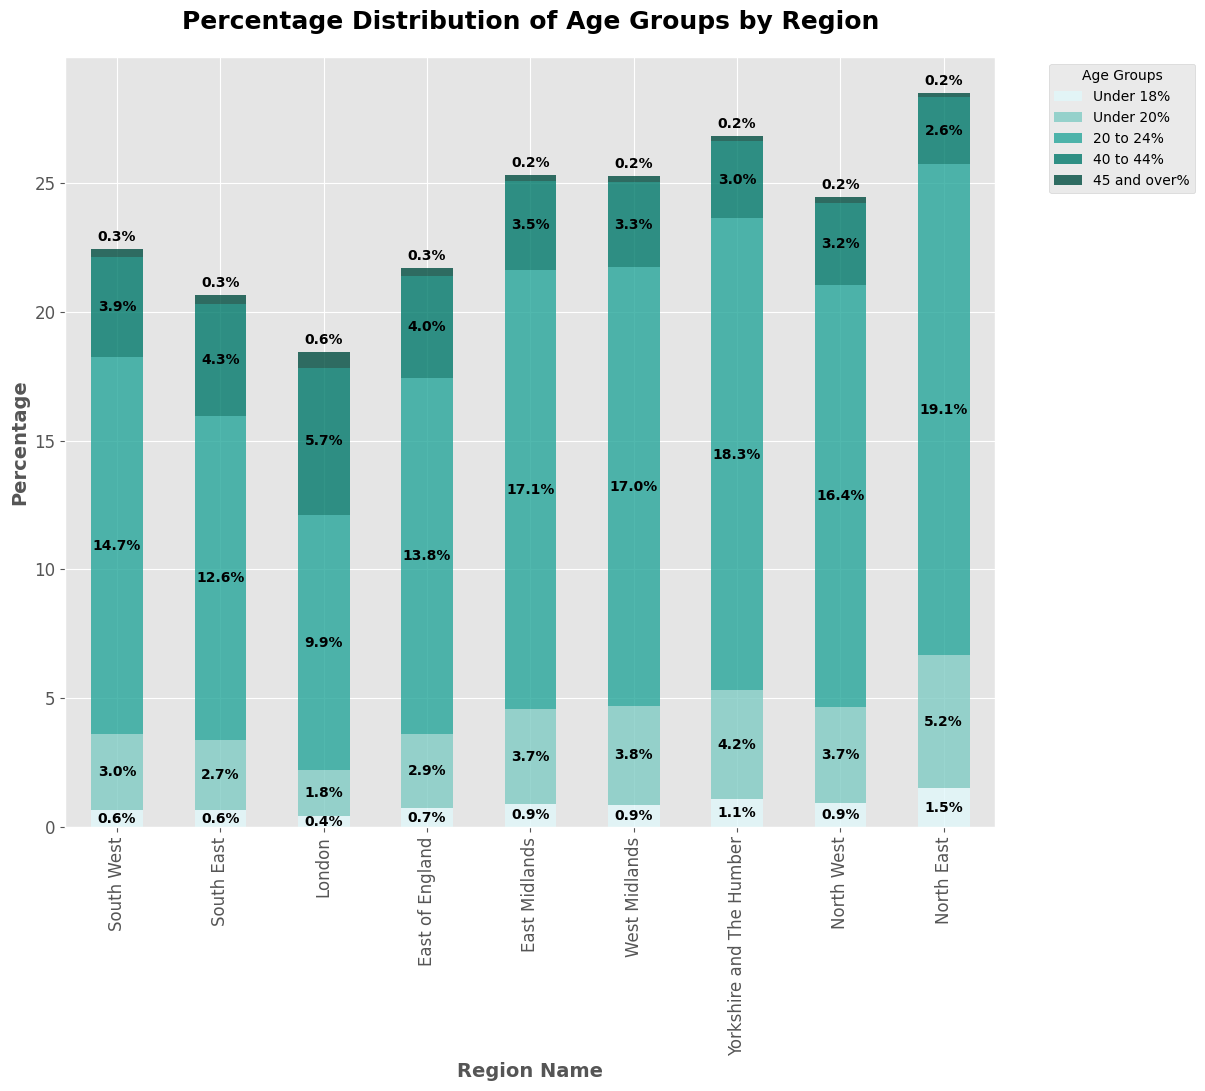

In [134]:
percentage_columns = ['Under 18%', 'Under 20%', '20 to 24%', '40 to 44%', '45 and over%']

fig, ax = plt.subplots(figsize=(12, 10))

regionmothersage.plot(
    x='Region name',
    y=percentage_columns,
    kind='bar',
    stacked=True,
    ax=ax,
    color=["#E0F7FA", "#80CBC4", "#26A69A", "#00796B", "#004D40"],
    alpha=0.8
)

for i in range(len(regionmothersage)):
    total = 0
    for col in percentage_columns:
        value = regionmothersage.loc[i, col]
        total += value

        if col == "45 and over%":
            ax.text(i, total + 0.2,f'{value:.1f}%', ha='center', va='bottom',fontsize=10, color='black', weight = 'bold')
        else:
            ax.text(i, total - value / 2,f'{value:.1f}%', ha='center', va='center', fontsize=10, color='black', weight = 'bold')


plt.title('Percentage Distribution of Age Groups by Region', fontsize=18, weight='bold', pad=20)
plt.xlabel('Region Name', fontsize=14, weight='bold')
plt.ylabel('Percentage', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Age Groups', fontsize=10, loc = "upper left", bbox_to_anchor=(1.05, 1))

plt.show()

In [135]:
deprivation.head()

LA Code               LA Name  GDHI Per Head (£)  IMD - Average score  \
0  E06000001            HARTLEPOOL              16934            34.853121   
1  E06000002         MIDDLESBROUGH              16222            40.443116   
2  E06000003  REDCAR AND CLEVELAND              17128            29.841330   
3  E06000004      STOCKTON-ON-TEES              17935            25.244108   
4  E06000005            DARLINGTON              18376            26.787000   

   IMD - Proportion of LSOAs in most deprived 10% nationally  
0                                             0.3793          
1                                             0.5000          
2                                             0.2614          
3                                             0.2167          
4                                             0.1846

In [136]:
regionaldeprivation = deprivation.merge(regions, left_on = 'LA Code', right_on = 'LA code', how = 'left')
regionaldeprivation.drop(columns = ['LA code', 'LA name'], inplace = True)
regionaldeprivation['IMD - Proportion of LSOAs in most deprived 10% nationally'] = regionaldeprivation['IMD - Proportion of LSOAs in most deprived 10% nationally']*100
regionaldeprivation.head()

LA Code               LA Name  GDHI Per Head (£)  IMD - Average score  \
0  E06000001            HARTLEPOOL              16934            34.853121   
1  E06000002         MIDDLESBROUGH              16222            40.443116   
2  E06000003  REDCAR AND CLEVELAND              17128            29.841330   
3  E06000004      STOCKTON-ON-TEES              17935            25.244108   
4  E06000005            DARLINGTON              18376            26.787000   

   IMD - Proportion of LSOAs in most deprived 10% nationally Region code  \
0                                              37.93           E12000001   
1                                              50.00           E12000001   
2                                              26.14           E12000001   
3                                              21.67           E12000001   
4                                              18.46           E12000001   

  Region name  
0  North East  
1  North East  
2  North East  
3  North East  
4  North East

<Figure size 2000x1200 with 0 Axes>

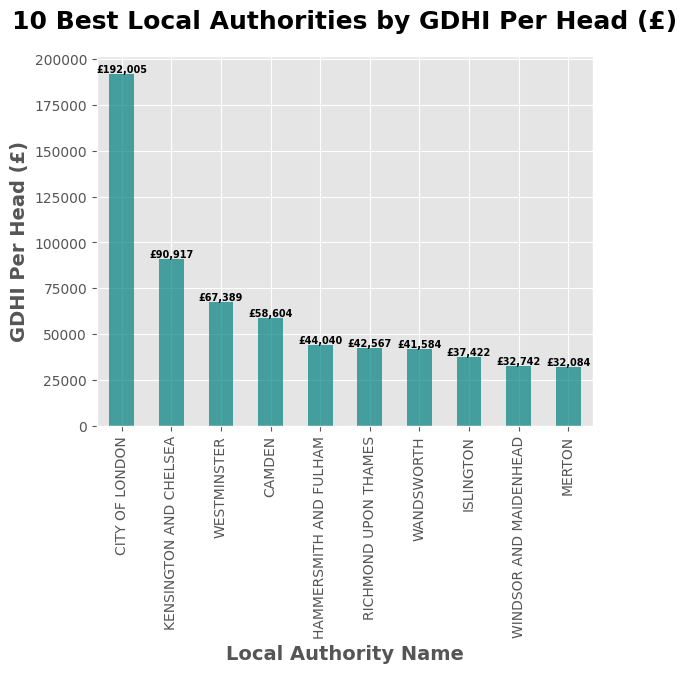

In [137]:
regionaldeprivation_sorted = regionaldeprivation.sort_values(by='GDHI Per Head (£)', ascending=False)

top_10 = regionaldeprivation_sorted.head(10)

plt.figure(figsize=(20, 12))
top_10.plot(x='LA Name', y='GDHI Per Head (£)', kind='bar', color='teal', alpha=0.7,legend=False)

for idx, value in enumerate(top_10['GDHI Per Head (£)']):
    plt.text(idx, value + 1000, f'£{int(value):,}', ha='center', fontsize=7, color='black', weight='bold')

plt.title('10 Best Local Authorities by GDHI Per Head (£)', fontsize=18, weight='bold', pad=20)
plt.xlabel('Local Authority Name', fontsize=14, weight='bold')
plt.ylabel('GDHI Per Head (£)', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<Figure size 2000x1200 with 0 Axes>

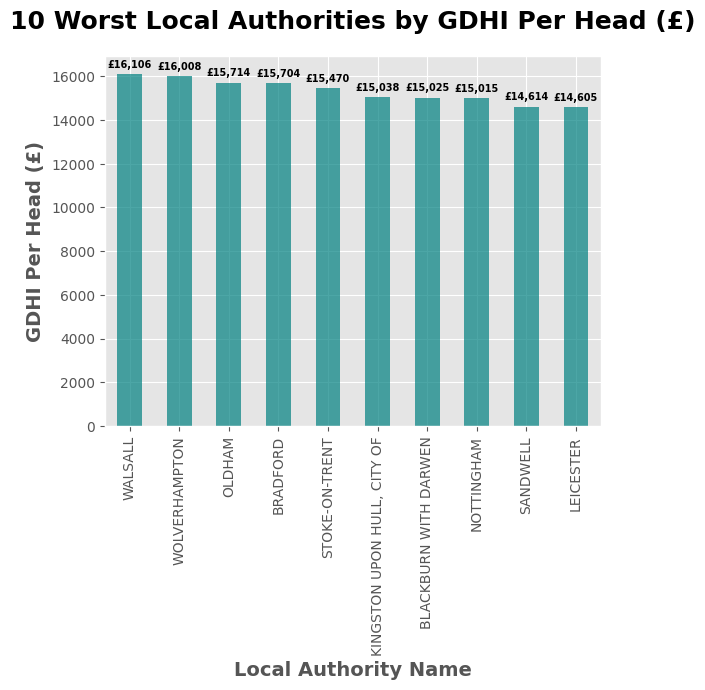

In [138]:
bottom_10 = regionaldeprivation_sorted.tail(10)

plt.figure(figsize=(20, 12))
bottom_10.plot(x='LA Name', y='GDHI Per Head (£)', kind='bar', color='teal', alpha=0.7,legend=False)

for idx, value in enumerate(bottom_10['GDHI Per Head (£)']):
    plt.text(idx, value+300, f'£{int(value):,}', ha='center', fontsize=7, color='black', weight='bold')

plt.title('10 Worst Local Authorities by GDHI Per Head (£)', fontsize=18, weight='bold', pad=20)
plt.xlabel('Local Authority Name', fontsize=14, weight='bold')
plt.ylabel('GDHI Per Head (£)', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<Figure size 2000x1200 with 0 Axes>

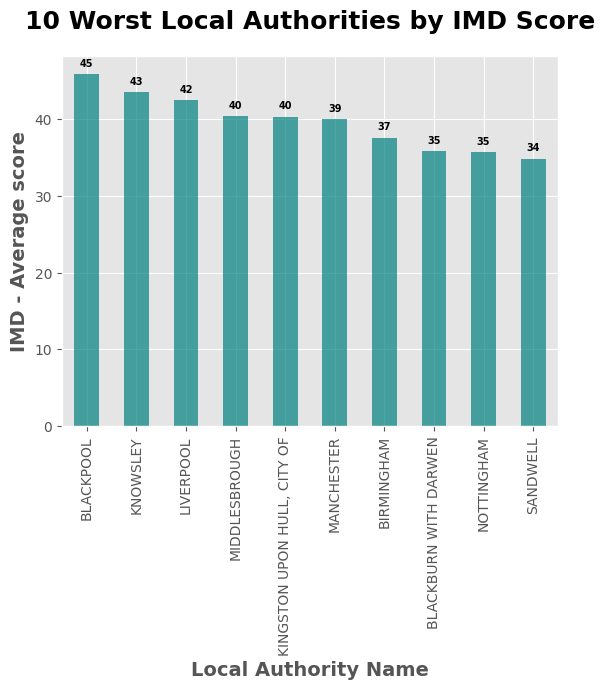

In [139]:
regionaldeprivation_sorted1 = regionaldeprivation.sort_values(by='IMD - Average score', ascending=False)

top_10imd = regionaldeprivation_sorted1.head(10)

plt.figure(figsize=(20, 12))
top_10imd.plot(x='LA Name', y='IMD - Average score', kind='bar', color='teal', alpha=0.7,legend=False)

for idx, value in enumerate(top_10imd['IMD - Average score']):
    plt.text(idx, value+1, f'{int(value):,}', ha='center', fontsize=7, color='black', weight='bold')

plt.title('10 Worst Local Authorities by IMD Score', fontsize=18, weight='bold', pad=20)
plt.xlabel('Local Authority Name', fontsize=14, weight='bold')
plt.ylabel('IMD - Average score', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<Figure size 2000x1200 with 0 Axes>

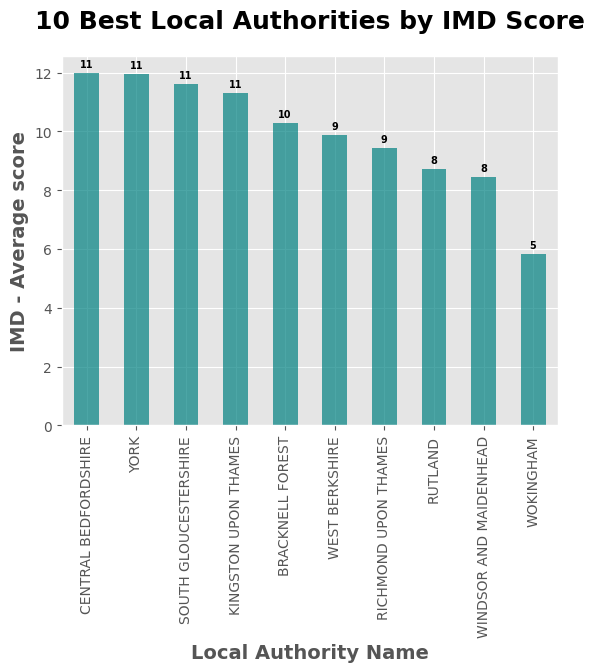

In [140]:
bottom_10imd = regionaldeprivation_sorted1.tail(10)

plt.figure(figsize=(20, 12))
bottom_10imd.plot(x='LA Name', y='IMD - Average score', kind='bar', color='teal', alpha=0.7,legend=False)

for idx, value in enumerate(bottom_10imd['IMD - Average score']):
    plt.text(idx, value+0.2, f'{int(value):,}', ha='center', fontsize=7, color='black', weight='bold')

plt.title('10 Best Local Authorities by IMD Score', fontsize=18, weight='bold', pad=20)
plt.xlabel('Local Authority Name', fontsize=14, weight='bold')
plt.ylabel('IMD - Average score', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<Figure size 2000x1200 with 0 Axes>

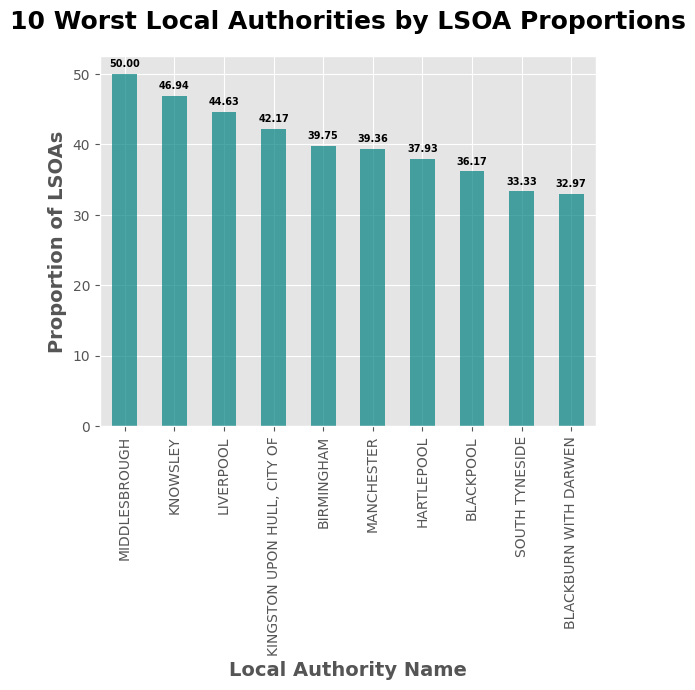

In [141]:
regionaldeprivation_sorted2 = regionaldeprivation.sort_values(by='IMD - Proportion of LSOAs in most deprived 10% nationally', ascending=False)

top_10lsoa = regionaldeprivation_sorted2.head(10)

plt.figure(figsize=(20, 12))
top_10lsoa.plot(x='LA Name', y='IMD - Proportion of LSOAs in most deprived 10% nationally', kind='bar', color='teal', alpha=0.7,legend=False)

for idx, value in enumerate(top_10lsoa['IMD - Proportion of LSOAs in most deprived 10% nationally']):
    plt.text(idx, value+1, f'{value:.2f}', ha='center', fontsize=7, color='black', weight='bold')

plt.title('10 Worst Local Authorities by LSOA Proportions', fontsize=18, weight='bold', pad=20)
plt.xlabel('Local Authority Name', fontsize=14, weight='bold')
plt.ylabel('Proportion of LSOAs', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<Figure size 2000x1200 with 0 Axes>

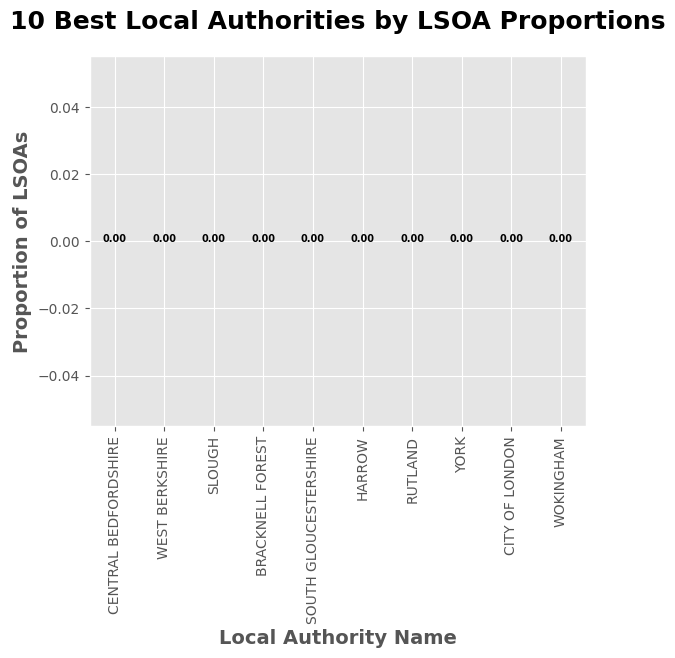

In [142]:
regionaldeprivation_sorted2 = regionaldeprivation.sort_values(by='IMD - Proportion of LSOAs in most deprived 10% nationally', ascending=False)

bottom_10lsoa = regionaldeprivation_sorted2.tail(10)

plt.figure(figsize=(20, 12))
bottom_10lsoa.plot(x='LA Name', y='IMD - Proportion of LSOAs in most deprived 10% nationally', kind='bar', color='teal', alpha=0.7,legend=False)

for idx, value in enumerate(bottom_10lsoa['IMD - Proportion of LSOAs in most deprived 10% nationally']):
    plt.text(idx, value, f'{value:.2f}', ha='center', fontsize=7, color='black', weight='bold')

plt.title('10 Best Local Authorities by LSOA Proportions', fontsize=18, weight='bold', pad=20)
plt.xlabel('Local Authority Name', fontsize=14, weight='bold')
plt.ylabel('Proportion of LSOAs', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

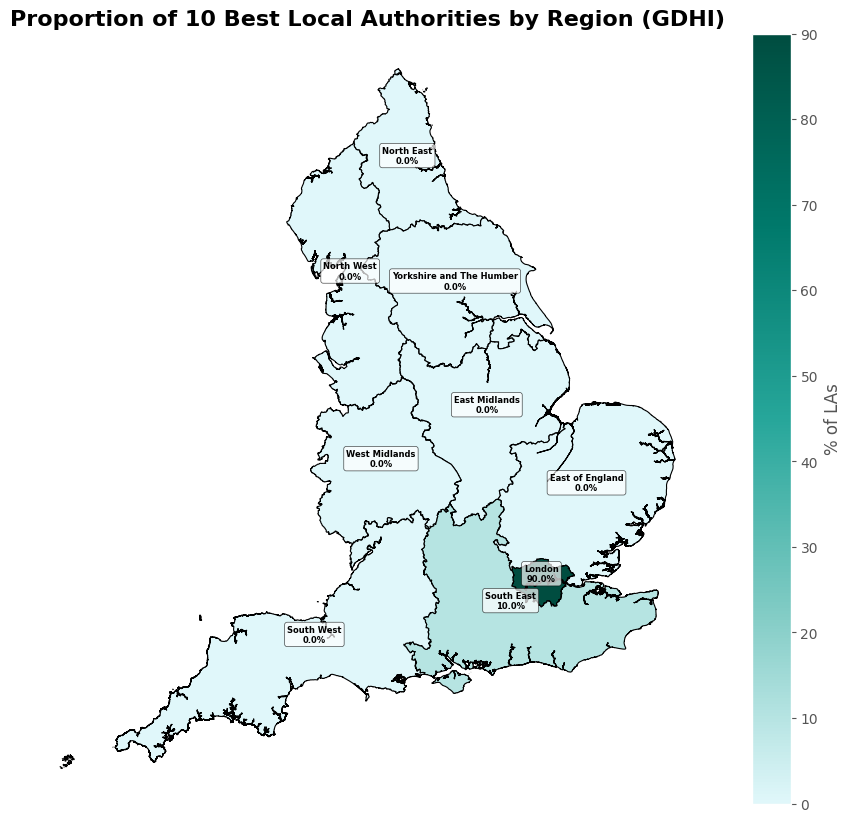

In [143]:
regionbest10gdhi = top_10['Region name'].value_counts().reset_index()
regionbest10gdhi.columns = ['Region name', 'Count']
regionbest10gdhi['Percentage'] = (regionbest10gdhi['Count'] / regionbest10gdhi['Count'].sum()) * 100

merged1 = england_regions.merge(regionbest10gdhi, on="Region name", how="left").fillna({"Count": 0, "Percentage": 0})

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = merged1.plot(column = 'Percentage', cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "% of LAs"},ax=ax)

ax.set_title("Proportion of 10 Best Local Authorities by Region (GDHI)", fontsize=16, weight="bold")
ax.axis("off")

for _, row in merged1.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['Percentage']}%",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

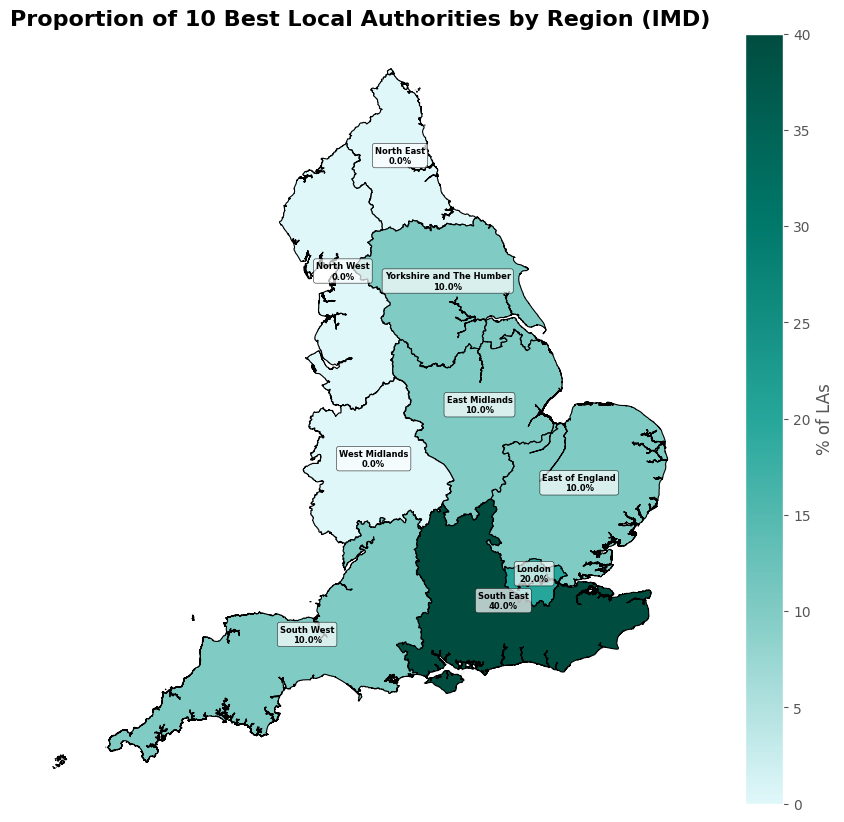

In [144]:
regionbest10imd = bottom_10imd['Region name'].value_counts().reset_index()
regionbest10imd.columns = ['Region name', 'Count']
regionbest10imd['Percentage'] = (regionbest10imd['Count'] / regionbest10imd['Count'].sum()) * 100

merged1 = england_regions.merge(regionbest10imd, on="Region name", how="left").fillna({"Count": 0, "Percentage": 0})

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = merged1.plot(column = 'Percentage', cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "% of LAs"},ax=ax)

ax.set_title("Proportion of 10 Best Local Authorities by Region (IMD)", fontsize=16, weight="bold")
ax.axis("off")

for _, row in merged1.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['Percentage']}%",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

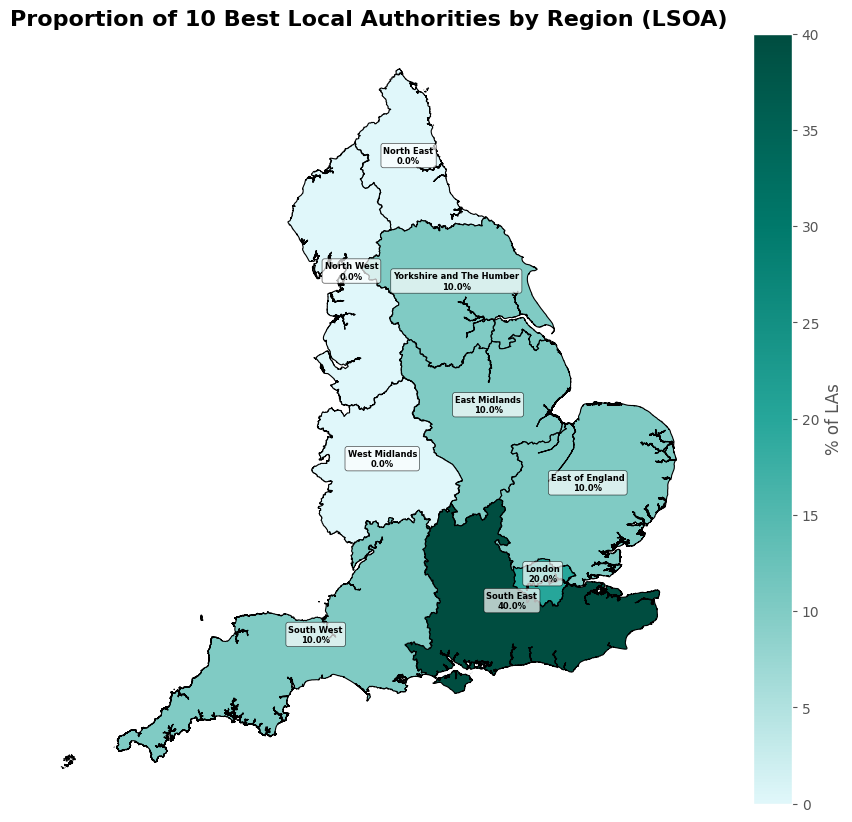

In [145]:
regionbest10lsoa = bottom_10lsoa['Region name'].value_counts().reset_index()
regionbest10lsoa.columns = ['Region name', 'Count']
regionbest10lsoa['Percentage'] = (regionbest10lsoa['Count'] / regionbest10lsoa['Count'].sum()) * 100

merged1 = england_regions.merge(regionbest10lsoa, on="Region name", how="left").fillna({"Count": 0, "Percentage": 0})

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = merged1.plot(column = 'Percentage', cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "% of LAs"},ax=ax)

ax.set_title("Proportion of 10 Best Local Authorities by Region (LSOA)", fontsize=16, weight="bold")
ax.axis("off")

for _, row in merged1.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['Percentage']}%",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

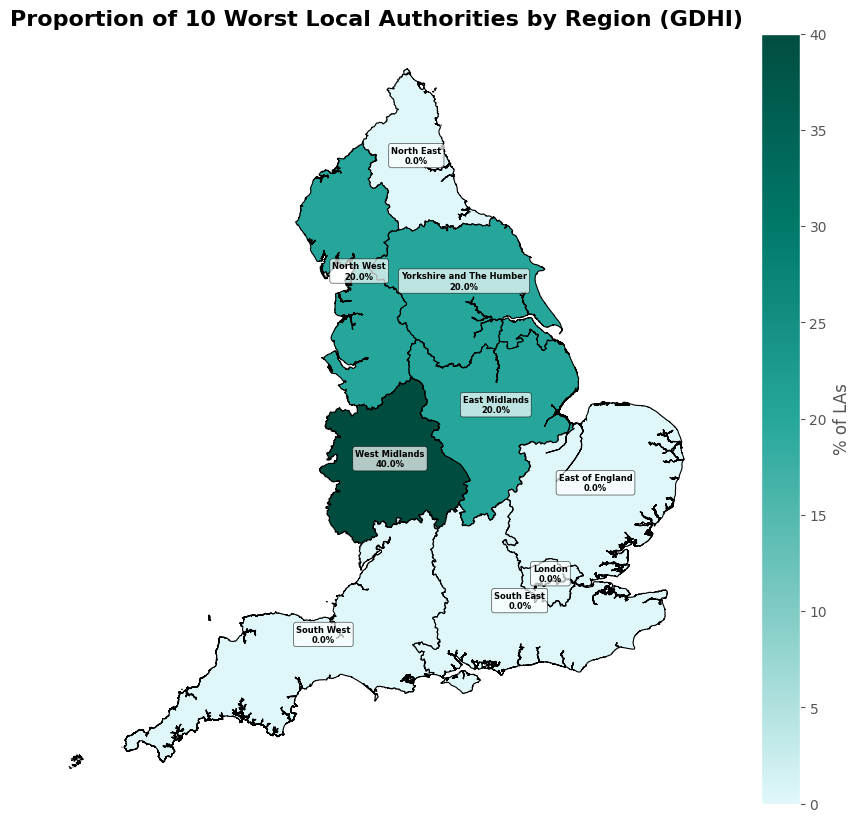

In [146]:
regionworst10gdhi = bottom_10['Region name'].value_counts().reset_index()
regionworst10gdhi.columns = ['Region name', 'Count']
regionworst10gdhi['Percentage'] = (regionworst10gdhi['Count'] / regionworst10gdhi['Count'].sum()) * 100

merged1 = england_regions.merge(regionworst10gdhi, on="Region name", how="left").fillna({"Count": 0, "Percentage": 0})

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = merged1.plot(column = 'Percentage', cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "% of LAs"},ax=ax)

ax.set_title("Proportion of 10 Worst Local Authorities by Region (GDHI)", fontsize=16, weight="bold")
ax.axis("off")

for _, row in merged1.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['Percentage']}%",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

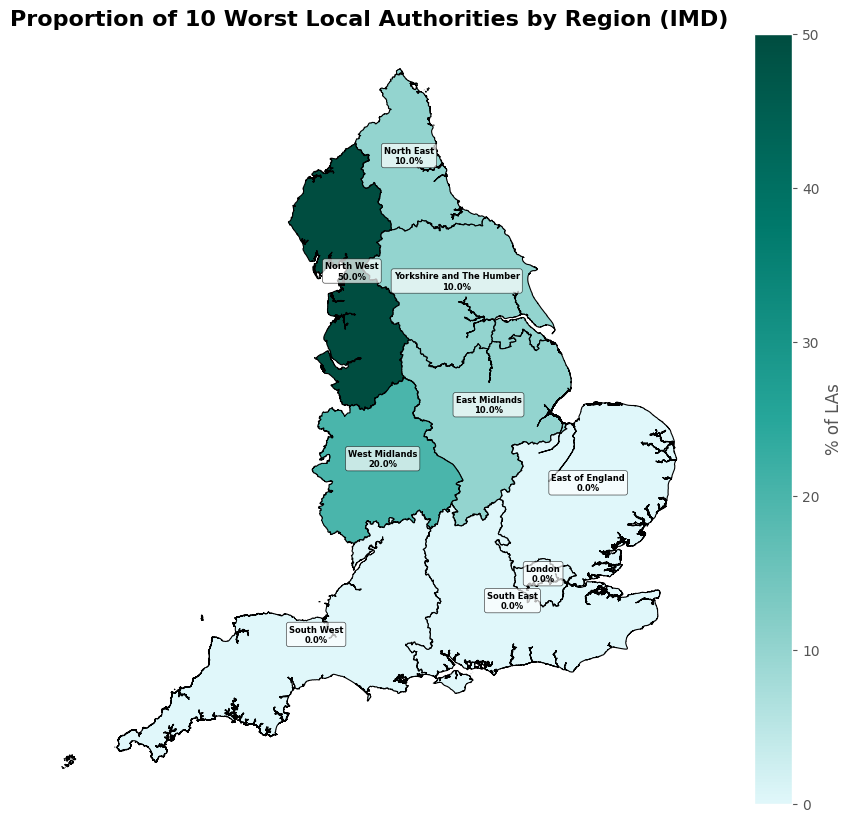

In [147]:
regionworst10imd = top_10imd['Region name'].value_counts().reset_index()
regionworst10imd.columns = ['Region name', 'Count']
regionworst10imd['Percentage'] = (regionworst10imd['Count'] / regionworst10imd['Count'].sum()) * 100

merged1 = england_regions.merge(regionworst10imd, on="Region name", how="left").fillna({"Count": 0, "Percentage": 0})

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = merged1.plot(column = 'Percentage', cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "% of LAs"},ax=ax)

ax.set_title("Proportion of 10 Worst Local Authorities by Region (IMD)", fontsize=16, weight="bold")
ax.axis("off")

for _, row in merged1.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['Percentage']}%",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

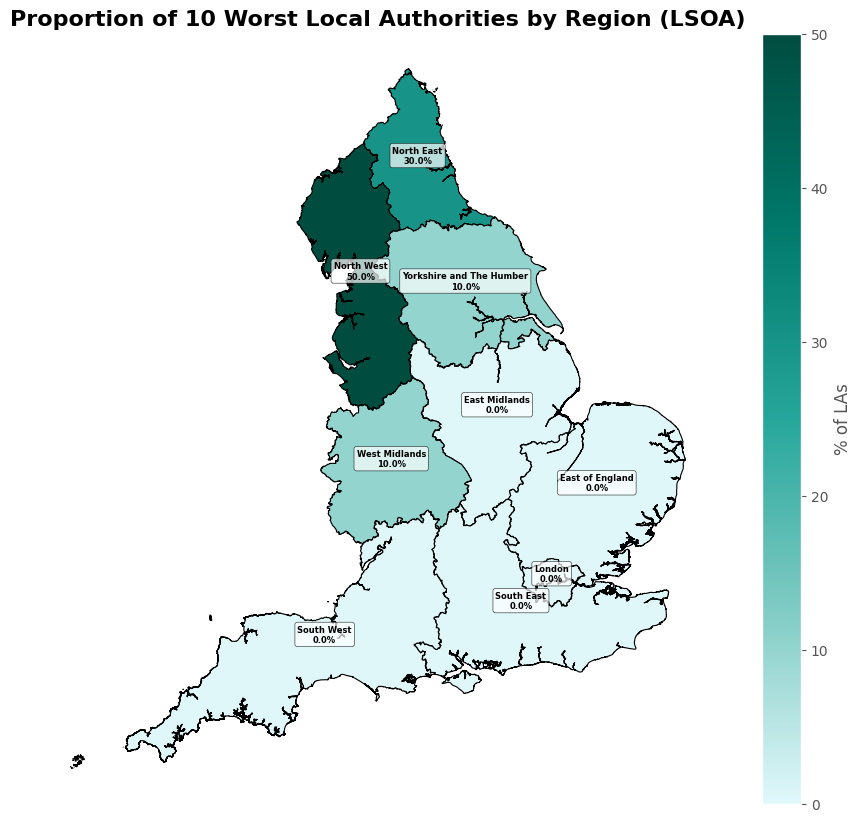

In [148]:
regionworst10lsoa = top_10lsoa['Region name'].value_counts().reset_index()
regionworst10lsoa.columns = ['Region name', 'Count']
regionworst10lsoa['Percentage'] = (regionworst10lsoa['Count'] / regionworst10lsoa['Count'].sum()) * 100

merged1 = england_regions.merge(regionworst10lsoa, on="Region name", how="left").fillna({"Count": 0, "Percentage": 0})

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = merged1.plot(column = 'Percentage', cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "% of LAs"},ax=ax)

ax.set_title("Proportion of 10 Worst Local Authorities by Region (LSOA)", fontsize=16, weight="bold")
ax.axis("off")

for _, row in merged1.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['Percentage']}%",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

In [149]:
parents.head(5)

LA Code                          LA Name  Total in marriage  \
0  K04000001, J99000001     ENGLAND, WALES AND ELSEWHERE             364521   
1             K02000001                   UNITED KINGDOM             404890   
2             J99000001  USUAL RESIDENCE OUTSIDE ENGLAND                122   
3             E92000001                          ENGLAND             350979   
4             E09000033                      WESTMINSTER               1930   

   Total outside marriage  Joint registrations same address  \
0                  331750                            223711   
1                  369945                            247222   
2                      56                                39   
3                  312178                            210483   
4                     724                               429   

   Joint registrations different address  Sole registrations  
0                                  71917               36122  
1                                  83083               39640  
2                                      8                   9  
3                                  67546               34149  
4                                    194                 101

In [150]:
## Removing top 3 rows for only considering England

parents1 = parents.iloc[3:].reset_index()
parents1.drop(columns = ['index'], inplace = True)
parents1 = parents1.assign(**{"LA Code": parents1["LA Code"].str.split(", ")}).explode("LA Code").reset_index(drop=True)
parents1 = parents1[parents1['LA Code']!= 'E06000053']

parents1.head(5)

LA Code         LA Name  Total in marriage  Total outside marriage  \
0  E92000001         ENGLAND             350979                  312178   
1  E09000033     WESTMINSTER               1930                     724   
2  E09000032      WANDSWORTH               3443                    1417   
3  E09000031  WALTHAM FOREST               2921                    1779   
4  E09000030   TOWER HAMLETS               2995                    1597   

   Joint registrations same address  Joint registrations different address  \
0                            210483                                  67546   
1                               429                                    194   
2                               868                                    346   
3                              1125                                    402   
4                               932                                    477   

   Sole registrations  
0               34149  
1                 101  
2                 203  
3                 252  
4                 188

In [151]:
regionalparents = parents1.merge(regions, left_on = 'LA Code', right_on = 'LA code', how = 'left')
regionalparents.drop(columns = ['LA code', 'LA name'], inplace = True)
regionalparents.head(5)

LA Code         LA Name  Total in marriage  Total outside marriage  \
0  E92000001         ENGLAND             350979                  312178   
1  E09000033     WESTMINSTER               1930                     724   
2  E09000032      WANDSWORTH               3443                    1417   
3  E09000031  WALTHAM FOREST               2921                    1779   
4  E09000030   TOWER HAMLETS               2995                    1597   

   Joint registrations same address  Joint registrations different address  \
0                            210483                                  67546   
1                               429                                    194   
2                               868                                    346   
3                              1125                                    402   
4                               932                                    477   

   Sole registrations Region code Region name  
0               34149         NaN         NaN  
1                 101   E12000007      London  
2                 203   E12000007      London  
3                 252   E12000007      London  
4                 188   E12000007      London

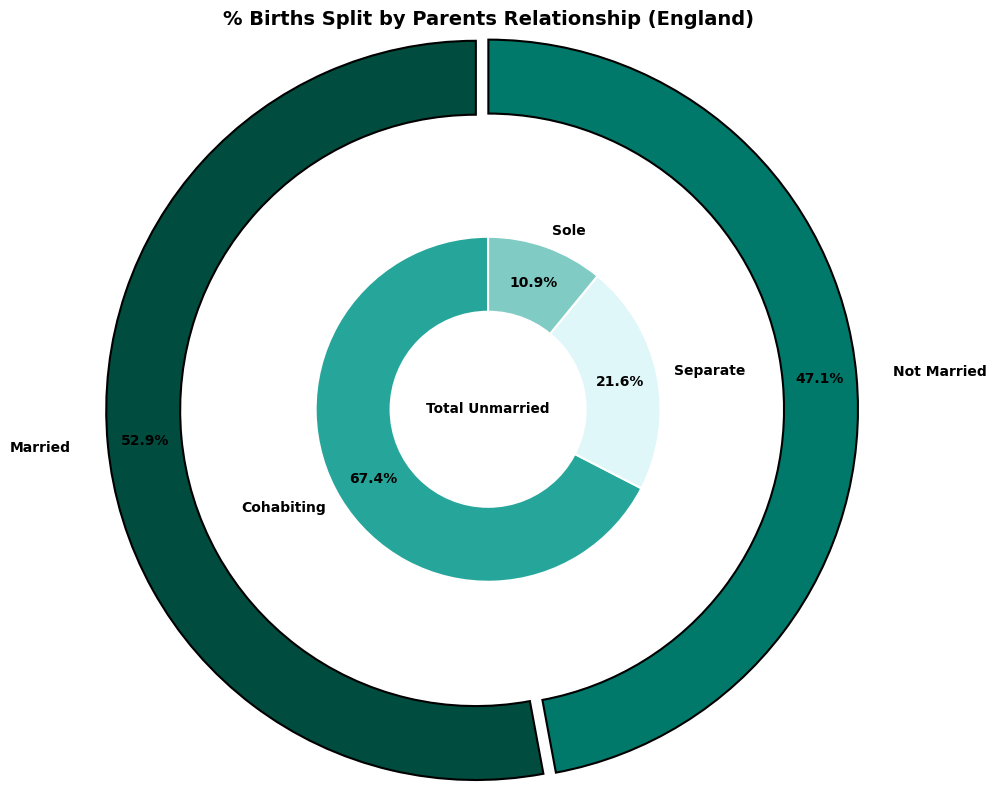

In [152]:
england_data = regionalparents.iloc[0]

outer_labels = ['Married', 'Not Married']
outer_values = [england_data['Total in marriage'], england_data['Total outside marriage']]

inner_labels = ['Cohabiting', 'Separate', 'Sole']
inner_values = [england_data['Joint registrations same address'],england_data['Joint registrations different address'],england_data['Sole registrations']]

outer_colors = ["#004D40", "#00796B"]
inner_colors = ["#26A69A", "#E0F7FA", "#80CBC4"]
explode_outer = [0.05, 0.001]

fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(outer_values, labels=outer_labels, explode=explode_outer,
       radius=1.5, colors=outer_colors, startangle=90,
       wedgeprops=dict(width=0.3, edgecolor='black', linewidth=1.5),
       autopct='%1.1f%%', pctdistance=0.9, textprops={'weight': 'bold'})

inner_radius = 0.7
ax.pie(inner_values, labels=inner_labels, radius=inner_radius,
       colors=inner_colors, startangle=90,
       wedgeprops=dict(width=0.33, edgecolor='w', linewidth=1.5),
       autopct='%1.1f%%', pctdistance=0.78, textprops={'weight': 'bold'})

centre_circle = plt.Circle((0, 0), 0.4, color='white', fc='white', linewidth=0)
fig.gca().add_artist(centre_circle)

plt.text(0, 0, 'Total Unmarried', ha='center', va='center', fontsize=9.8, weight='bold', color='black')
plt.title('% Births Split by Parents Relationship (England)', fontsize=14, weight='bold', pad=55)

plt.show()

In [153]:
regionalparents['Total births'] = regionalparents['Total in marriage'] + regionalparents['Total outside marriage']

regionalparents.head()

LA Code         LA Name  Total in marriage  Total outside marriage  \
0  E92000001         ENGLAND             350979                  312178   
1  E09000033     WESTMINSTER               1930                     724   
2  E09000032      WANDSWORTH               3443                    1417   
3  E09000031  WALTHAM FOREST               2921                    1779   
4  E09000030   TOWER HAMLETS               2995                    1597   

   Joint registrations same address  Joint registrations different address  \
0                            210483                                  67546   
1                               429                                    194   
2                               868                                    346   
3                              1125                                    402   
4                               932                                    477   

   Sole registrations Region code Region name  Total births  
0               34149         NaN         NaN        663157  
1                 101   E12000007      London          2654  
2                 203   E12000007      London          4860  
3                 252   E12000007      London          4700  
4                 188   E12000007      London          4592

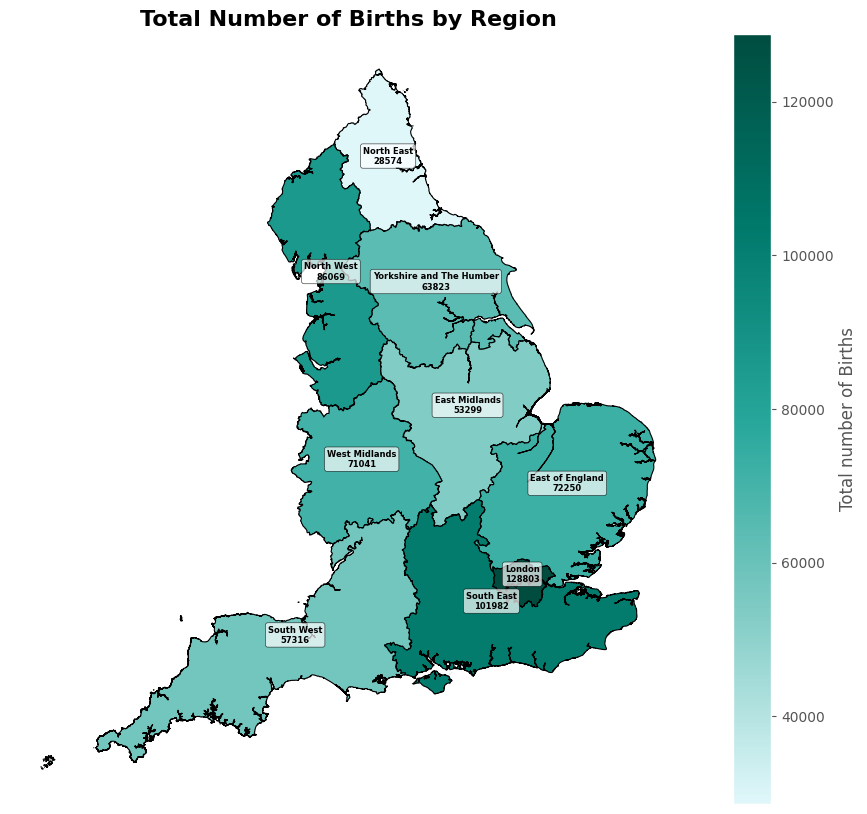

In [154]:
regionbirths = regionalparents.groupby('Region name')['Total births'].sum().sort_values(ascending=False).reset_index()

merged2 = england_regions.merge(regionbirths, on="Region name", how="left")

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = merged2.plot(column = 'Total births', cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "Total number of Births"},ax=ax)

ax.set_title("Total Number of Births by Region", fontsize=16, weight="bold")
ax.axis("off")

for _, row in merged2.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['Total births']}",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

In [155]:
regionbirthssplit = regionalparents.groupby('Region name')[['Total in marriage', 'Total outside marriage']].sum().reset_index()
regionbirthssplit['Married %'] = (regionbirthssplit['Total in marriage']/(regionbirthssplit['Total in marriage'] + regionbirthssplit['Total outside marriage']))*100
regionbirthssplit['Unmarried %'] = (regionbirthssplit['Total outside marriage']/(regionbirthssplit['Total in marriage'] + regionbirthssplit['Total outside marriage']))*100

regionbirthssplit[['Region name', 'Married %', 'Unmarried %']].round(2).sort_values(by = 'Married %', ascending = False)

Region name  Married %  Unmarried %
2                    London      63.50        36.50
5                South East      56.90        43.10
1           East of England      54.07        45.93
6                South West      51.77        48.23
7             West Midlands      50.33        49.67
0             East Midlands      48.14        51.86
8  Yorkshire and The Humber      46.94        53.06
4                North West      45.98        54.02
3                North East      40.19        59.81

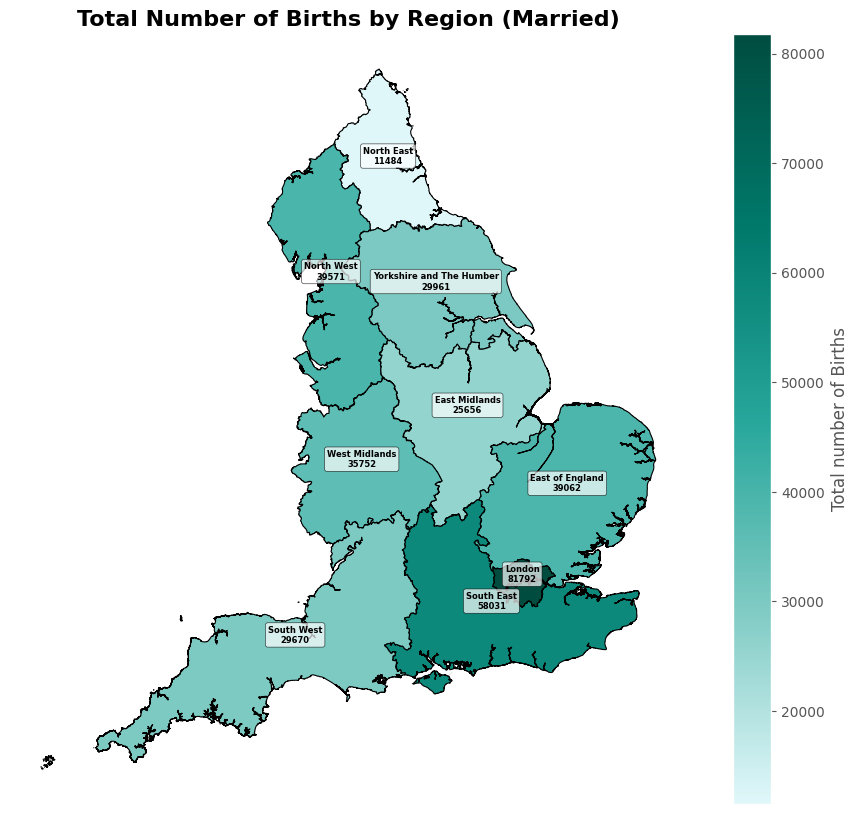

In [156]:
regionbirthsmarried = regionalparents.groupby('Region name')['Total in marriage'].sum().sort_values(ascending=False).reset_index()

merged2 = england_regions.merge(regionbirthsmarried, on="Region name", how="left")

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = merged2.plot(column = 'Total in marriage', cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "Total number of Births"},ax=ax)

ax.set_title("Total Number of Births by Region (Married)", fontsize=16, weight="bold")
ax.axis("off")

for _, row in merged2.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['Total in marriage']}",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

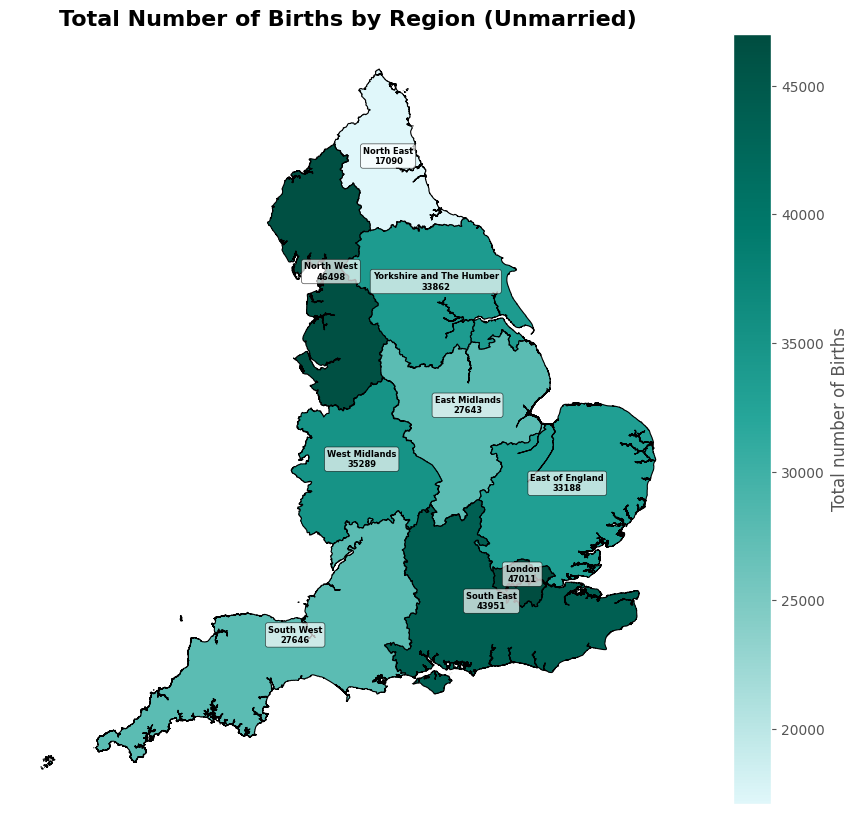

In [157]:
regionbirthsunmarried = regionalparents.groupby('Region name')['Total outside marriage'].sum().sort_values(ascending=False).reset_index()

merged2 = england_regions.merge(regionbirthsunmarried, on="Region name", how="left")

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = merged2.plot(column = 'Total outside marriage', cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "Total number of Births"},ax=ax)

ax.set_title("Total Number of Births by Region (Unmarried)", fontsize=16, weight="bold")
ax.axis("off")

for _, row in merged2.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['Total outside marriage']}",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

In [158]:
regionbirthssplitunmarried = regionalparents.groupby('Region name')[['Joint registrations same address', 'Joint registrations different address', 'Sole registrations']].sum().reset_index()
regionbirthssplitunmarried['Cohabitating %'] = (regionbirthssplitunmarried['Joint registrations same address']/(regionbirthssplitunmarried['Joint registrations same address'] + regionbirthssplitunmarried['Joint registrations different address'] + regionbirthssplitunmarried['Sole registrations'] ))*100
regionbirthssplitunmarried['Separate %'] = (regionbirthssplitunmarried['Joint registrations different address']/(regionbirthssplitunmarried['Joint registrations same address'] + regionbirthssplitunmarried['Joint registrations different address'] + regionbirthssplitunmarried['Sole registrations'] ))*100
regionbirthssplitunmarried['Sole %'] = (regionbirthssplitunmarried['Sole registrations']/(regionbirthssplitunmarried['Joint registrations same address'] + regionbirthssplitunmarried['Joint registrations different address'] + regionbirthssplitunmarried['Sole registrations'] ))*100

regionbirthssplitunmarried[['Region name', 'Cohabitating %', 'Separate %', 'Sole %']].round(2).sort_values(by = 'Cohabitating %', ascending = False)

Region name  Cohabitating %  Separate %  Sole %
6                South West           75.52       15.80    8.68
1           East of England           73.52       17.30    9.18
5                South East           72.97       18.00    9.04
0             East Midlands           70.69       18.99   10.32
8  Yorkshire and The Humber           68.26       21.22   10.52
4                North West           65.44       23.28   11.27
7             West Midlands           64.94       23.36   11.71
3                North East           61.15       27.88   10.97
2                    London           56.76       28.20   15.04

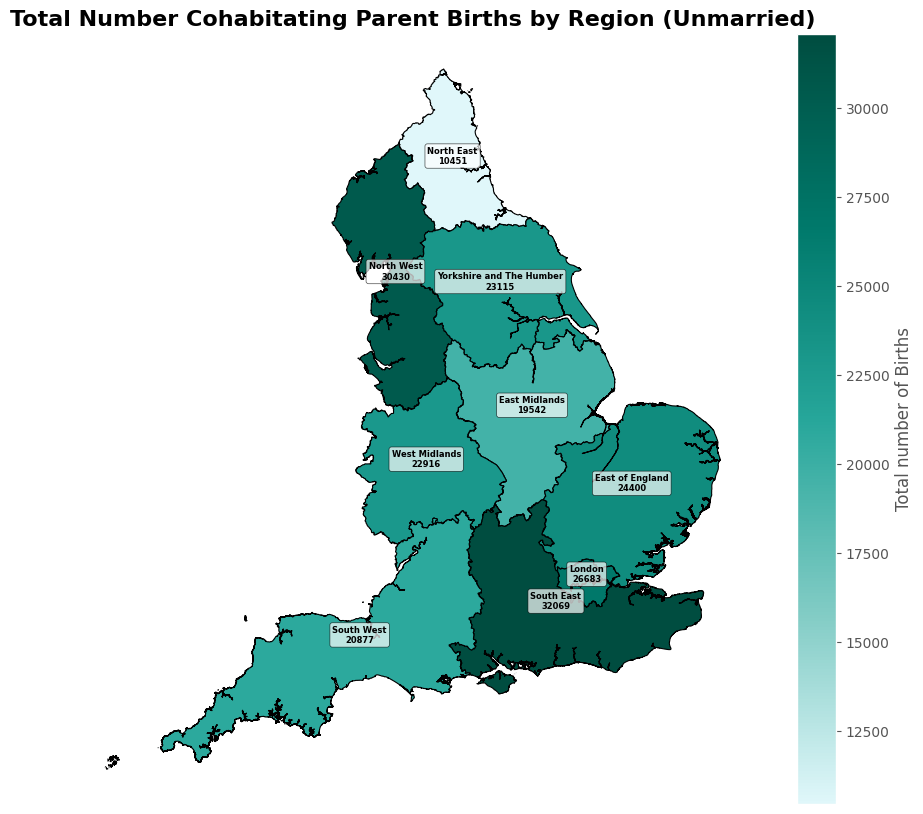

In [159]:
regionbirthscohabitate = regionalparents.groupby('Region name')['Joint registrations same address'].sum().sort_values(ascending=False).reset_index()

merged2 = england_regions.merge(regionbirthscohabitate, on="Region name", how="left")

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = merged2.plot(column = 'Joint registrations same address', cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "Total number of Births"},ax=ax)

ax.set_title("Total Number Cohabitating Parent Births by Region (Unmarried)", fontsize=16, weight="bold")
ax.axis("off")

for _, row in merged2.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['Joint registrations same address']}",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

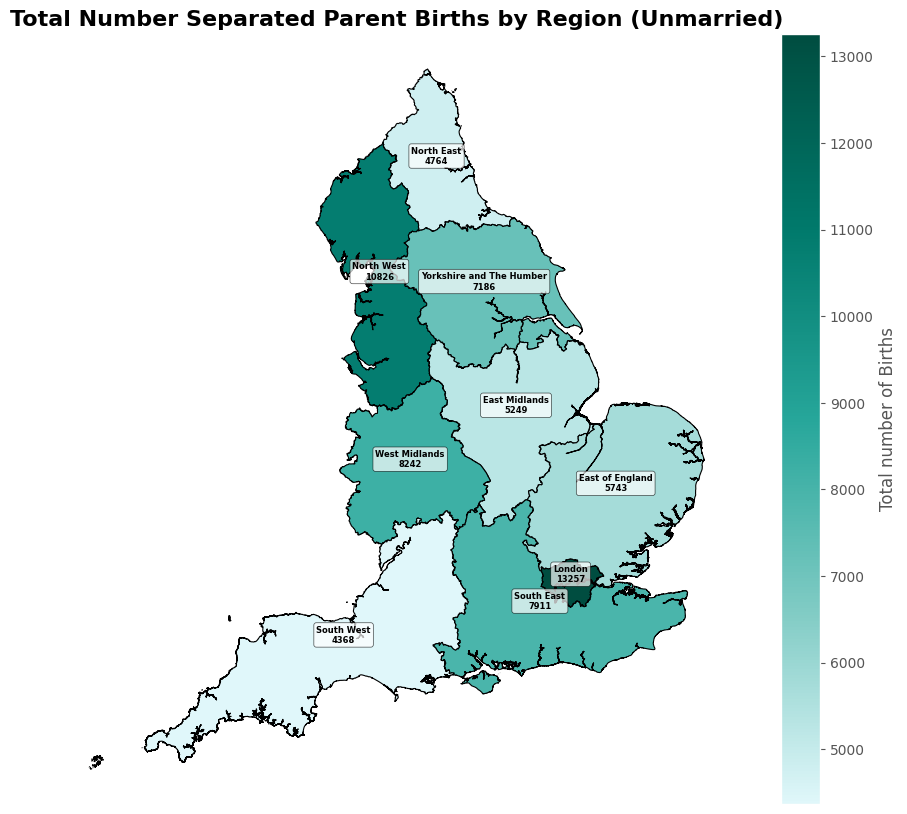

In [160]:
regionbirthsseparate = regionalparents.groupby('Region name')['Joint registrations different address'].sum().sort_values(ascending=False).reset_index()

merged2 = england_regions.merge(regionbirthsseparate, on="Region name", how="left")

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = merged2.plot(column = 'Joint registrations different address', cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "Total number of Births"},ax=ax)

ax.set_title("Total Number Separated Parent Births by Region (Unmarried)", fontsize=16, weight="bold")
ax.axis("off")

for _, row in merged2.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['Joint registrations different address']}",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

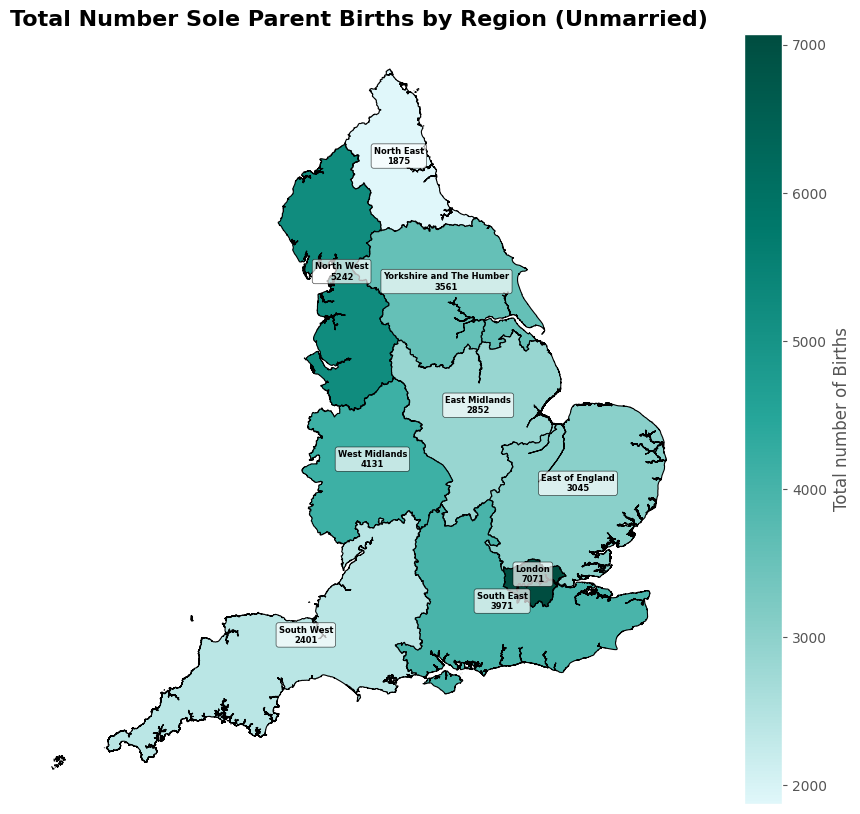

In [161]:
regionbirthssole = regionalparents.groupby('Region name')['Sole registrations'].sum().sort_values(ascending=False).reset_index()

merged2 = england_regions.merge(regionbirthssole, on="Region name", how="left")

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = merged2.plot(column = 'Sole registrations', cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "Total number of Births"},ax=ax)

ax.set_title("Total Number Sole Parent Births by Region (Unmarried)", fontsize=16, weight="bold")
ax.axis("off")

for _, row in merged2.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['Sole registrations']}",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

In [162]:
regionalbme = bme.merge(regions, left_on = 'AREA CODE', right_on = 'LA code', how = 'left')
regionalbme.drop(columns = ['LA code', 'LA name'], inplace = True)

regionalbme.head(5)

AREA CODE       AREA NAME   %BME Region code Region name
0  E09000033     WESTMINSTER  0.447   E12000007      London
1  E09000032      WANDSWORTH  0.321   E12000007      London
2  E09000031  WALTHAM FOREST  0.470   E12000007      London
3  E09000030   TOWER HAMLETS  0.608   E12000007      London
4  E09000029          SUTTON  0.316   E12000007      London

<Figure size 2000x1200 with 0 Axes>

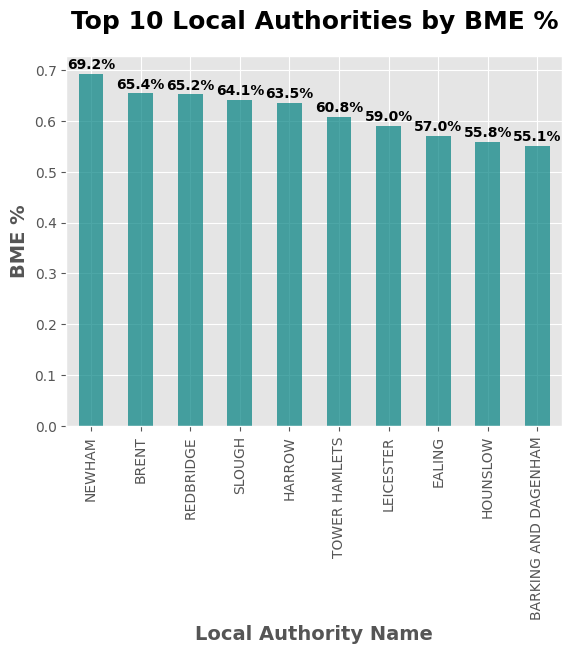

In [163]:
regionalbme_sorted = regionalbme.sort_values(by='%BME', ascending=False)

top_10bme = regionalbme_sorted.head(10)

plt.figure(figsize=(20, 12))
top_10bme.plot(x='AREA NAME', y='%BME', kind='bar', color='teal', alpha=0.7, legend=False)

for idx, value in enumerate(top_10bme['%BME']):
    plt.text(idx, value+0.01, f'{value*100:.1f}%', ha='center', fontsize=10, color='black', weight='bold')

plt.title('Top 10 Local Authorities by BME %', fontsize=18, weight='bold', pad=20)
plt.xlabel('Local Authority Name', fontsize=14, weight='bold')
plt.ylabel('BME %', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<Figure size 2000x1200 with 0 Axes>

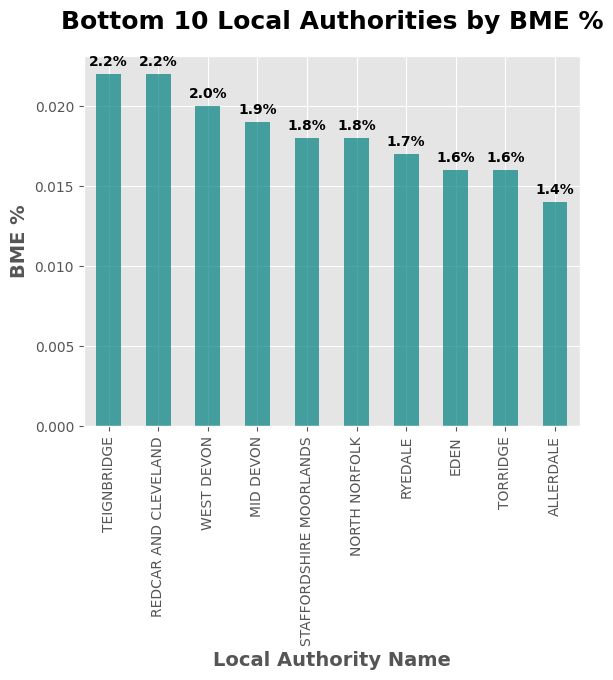

In [164]:
regionalbme_sorted = regionalbme.sort_values(by='%BME', ascending=False)

bottom_10bme = regionalbme_sorted.tail(10)

plt.figure(figsize=(20, 12))
bottom_10bme.plot(x='AREA NAME', y='%BME', kind='bar', color='teal', alpha=0.7, legend=False)

for idx, value in enumerate(bottom_10bme['%BME']):
    plt.text(idx, value+0.0005, f'{value*100:.1f}%', ha='center', fontsize=10, color='black', weight='bold')

plt.title('Bottom 10 Local Authorities by BME %', fontsize=18, weight='bold', pad=20)
plt.xlabel('Local Authority Name', fontsize=14, weight='bold')
plt.ylabel('BME %', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

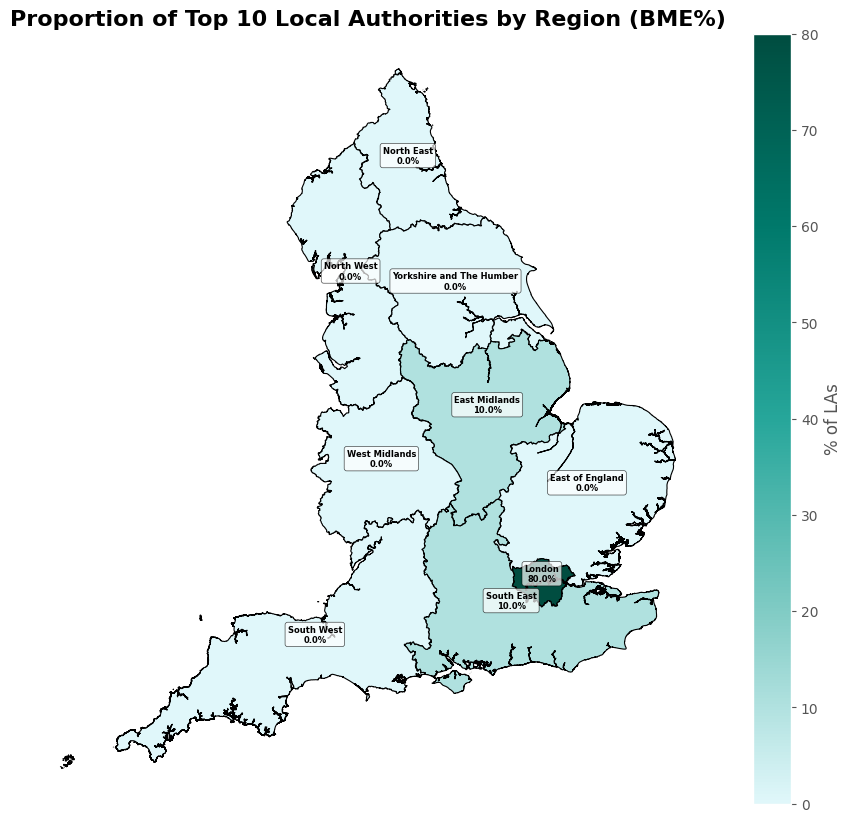

In [165]:
regiontop10bme = top_10bme['Region name'].value_counts().reset_index()
regiontop10bme.columns = ['Region name', 'Count']
regiontop10bme['Percentage'] = (regiontop10bme['Count'] / regiontop10bme['Count'].sum()) * 100

merged5 = england_regions.merge(regiontop10bme, on="Region name", how="left").fillna({"Count": 0, "Percentage": 0})

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = merged5.plot(column = 'Percentage', cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "% of LAs"},ax=ax)

ax.set_title("Proportion of Top 10 Local Authorities by Region (BME%)", fontsize=16, weight="bold")
ax.axis("off")

for _, row in merged5.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['Percentage']}%",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

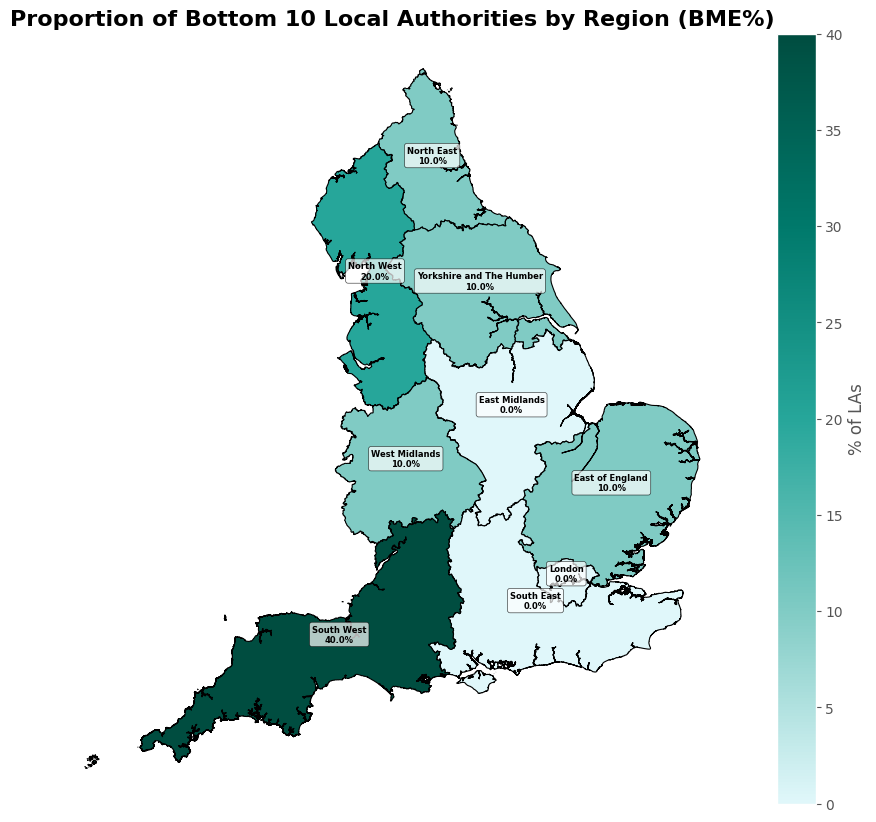

In [166]:
regionbottom10bme = bottom_10bme['Region name'].value_counts().reset_index()
regionbottom10bme.columns = ['Region name', 'Count']
regionbottom10bme['Percentage'] = (regionbottom10bme['Count'] / regionbottom10bme['Count'].sum()) * 100

merged5 = england_regions.merge(regionbottom10bme, on="Region name", how="left").fillna({"Count": 0, "Percentage": 0})

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = merged5.plot(column = 'Percentage', cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "% of LAs"},ax=ax)

ax.set_title("Proportion of Bottom 10 Local Authorities by Region (BME%)", fontsize=16, weight="bold")
ax.axis("off")

for _, row in merged5.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['Percentage']}%",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

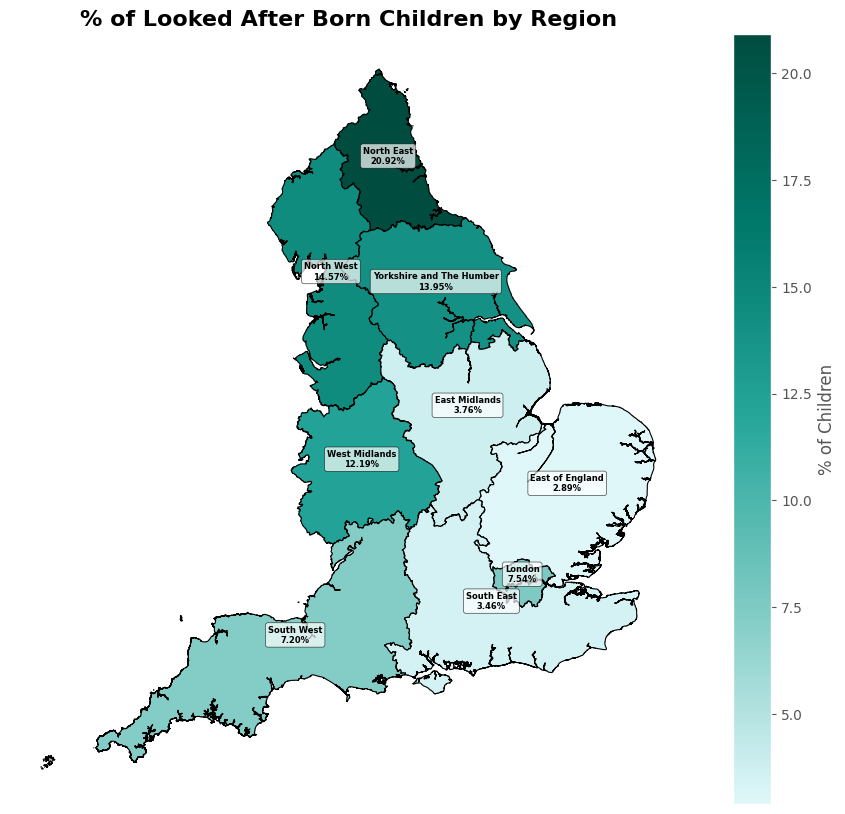

In [167]:
merged = england_regions.merge(region_summary, on="Region name")
regionbirths = regionalparents.groupby('Region name')['Total births'].sum().sort_values(ascending=False).reset_index()
mergedfinal = merged.merge(regionbirths, on = 'Region name')
mergedfinal['% looked after children'] = mergedfinal['# looked after children']/mergedfinal['Total births']*100

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
choropleth = mergedfinal.plot(column="% looked after children",cmap=teal_cmap,linewidth=0.8,edgecolor="black",legend=True,legend_kwds={'label': "% of Children"},ax=ax)

ax.set_title("% of Looked After Born Children by Region", fontsize=16, weight="bold")
ax.axis("off")

for _, row in mergedfinal.iterrows():
    centroid = row["geometry"].centroid
    label_lat_offset = 0.5 if centroid.y > 52 else -0.5
    label_lon_offset = 0.5 if centroid.x < -1 else -0.5

    ax.text(
        centroid.x + label_lon_offset, centroid.y + label_lat_offset,
        f"{row['Region name']}\n{row['% looked after children']:.2f}%",
        horizontalalignment='center',
        fontsize=6,
        color='black',
        weight="bold",
        bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3", alpha=0.7)
    )

plt.show()

In [168]:
regionalincidence.head()

LA Code                 LA Name  # looked after children  \
0  E06000053         ISLES OF SCILLY                        0   
1  E09000001          CITY OF LONDON                        9   
2  E06000017                 RUTLAND                       32   
3  E09000020  KENSINGTON AND CHELSEA                      105   
4  E09000021    KINGSTON UPON THAMES                      111   

   Estimated Under 18's Population  % looked after children  \
0                              359                 0.000000   
1                              591                 0.015228   
2                             7974                 0.004013   
3                            22594                 0.004647   
4                            36460                 0.003044   

                  LA name Region code    Region name  
0         Isles of Scilly   E12000009     South West  
1          City of London   E12000007         London  
2                 Rutland   E12000004  East Midlands  
3  Kensington and Chelsea   E12000007         London  
4    Kingston upon Thames   E12000007         London

In [169]:
## Putting Isles of Scilly and Cornwall in the same row as in other sheets

isles_of_scilly = regionalincidence[regionalincidence['LA Name'] == 'ISLES OF SCILLY']
cornwall = regionalincidence[regionalincidence['LA Name'].str.contains('CORNWALL', case=False)]

combined_row = cornwall.copy()
combined_row['# looked after children'] += isles_of_scilly['# looked after children'].values[0]
combined_row['Estimated Under 18\'s Population'] += isles_of_scilly['Estimated Under 18\'s Population'].values[0]
combined_row['% looked after children'] = (combined_row['# looked after children'] / combined_row['Estimated Under 18\'s Population'])

combined_row['LA Name'] = 'Cornwall and Isles of Scilly'
combined_row['LA Code'] = 'E06000052'


combined_row

regionalincidence = regionalincidence[~regionalincidence['LA Name'].isin(['ISLES OF SCILLY', 'CORNWALL'])]
regionalincidence = pd.concat([regionalincidence, combined_row], ignore_index=True)

regionalincidence.head()

LA Code                 LA Name  # looked after children  \
0  E09000001          CITY OF LONDON                        9   
1  E06000017                 RUTLAND                       32   
2  E09000020  KENSINGTON AND CHELSEA                      105   
3  E09000021    KINGSTON UPON THAMES                      111   
4  E09000024                  MERTON                      123   

   Estimated Under 18's Population  % looked after children  \
0                              591                 0.015228   
1                             7974                 0.004013   
2                            22594                 0.004647   
3                            36460                 0.003044   
4                            47200                 0.002606   

                  LA name Region code    Region name  
0          City of London   E12000007         London  
1                 Rutland   E12000004  East Midlands  
2  Kensington and Chelsea   E12000007         London  
3    Kingston upon Thames   E12000007         London  
4                  Merton   E12000007         London

In [170]:
regionalmothersage['Under 18%'] = (regionalmothersage['Under 18']/regionalmothersage['All ages'])*100
regionalmothersage['Under 20%'] = (regionalmothersage['Under 20']/regionalmothersage['All ages'])*100
regionalmothersage['20 to 24%'] = (regionalmothersage['20 to 24']/regionalmothersage['All ages'])*100
regionalmothersage['40 to 44%'] = (regionalmothersage['40 to 44']/regionalmothersage['All ages'])*100
regionalmothersage['45 and over%'] = (regionalmothersage['45 and over']/regionalmothersage['All ages'])*100
regionalmothersage['Rest%'] = 100 - ((regionalmothersage['Under 18%'] + regionalmothersage['Under 20%'] + regionalmothersage['20 to 24%'] + regionalmothersage['40 to 44%'] + regionalmothersage['45 and over%']))

regionalmothersage.head()

LA Code                             LA Name  All ages  Under 18  \
0  E92000001  ENGLAND                               663157      5025   
1  E09000033  Westminster                             2654         1   
2  E09000032  Wandsworth                              4860        18   
3  E09000031  Waltham Forest                          4700        20   
4  E09000030  Tower Hamlets                           4592         6   

   Under 20  20 to 24  40 to 44  45 and over Region code Region name  \
0     20963     96519     26447         2207         NaN         NaN   
1        20       170       225           20   E12000007      London   
2        50       269       361           26   E12000007      London   
3        91       505       244           19   E12000007      London   
4        63       448       211           20   E12000007      London   

   Under 18%  Under 20%  20 to 24%  40 to 44%  45 and over%      Rest%  
0   0.757739   3.161092  14.554472   3.988045      0.332802  77.205850  
1   0.037679   0.753580   6.405426   8.477769      0.753580  83.571967  
2   0.370370   1.028807   5.534979   7.427984      0.534979  85.102881  
3   0.425532   1.936170  10.744681   5.191489      0.404255  81.297872  
4   0.130662   1.371951   9.756098   4.594948      0.435540  83.710801

In [171]:
## Filling the combined calculated values for Bournemouth, Christchurch and Poole

regionalmothersage_bcp = regionalmothersage[regionalmothersage['LA Name'].str.contains('BOURNEMOUTH|CHRISTCHURCH|POOLE', case=False)]

bcp_combined = regionalmothersage_bcp[['Under 18', 'Under 20', '20 to 24', '40 to 44', '45 and over', 'All ages']].sum().to_frame().T

bcp_combined['LA Code'] = 'E06000058'
bcp_combined['LA Name'] = 'BOURNEMOUTH, CHRISTCHURCH AND POOLE'

bcp_combined['Under 18%'] = (bcp_combined['Under 18'] / bcp_combined['All ages']) * 100
bcp_combined['Under 20%'] = (bcp_combined['Under 20'] / bcp_combined['All ages']) * 100
bcp_combined['20 to 24%'] = (bcp_combined['20 to 24'] / bcp_combined['All ages']) * 100
bcp_combined['40 to 44%'] = (bcp_combined['40 to 44'] / bcp_combined['All ages']) * 100
bcp_combined['45 and over%'] = (bcp_combined['45 and over'] / bcp_combined['All ages']) * 100

bcp_combined['Rest%'] = 100 - (bcp_combined['Under 18%'] + bcp_combined['Under 20%'] + bcp_combined['20 to 24%'] + bcp_combined['40 to 44%'] + bcp_combined['45 and over%'])

regionalmothersage = regionalmothersage[~regionalmothersage['LA Name'].str.contains('BOURNEMOUTH|CHRISTCHURCH|POOLE', case=False)]
regionalmothersage = pd.concat([regionalmothersage, bcp_combined], ignore_index=True)

regionalmothersage[regionalmothersage['LA Code'] == 'E06000058']

LA Code                              LA Name  All ages  Under 18  \
323  E06000058  BOURNEMOUTH, CHRISTCHURCH AND POOLE      4133        22   

     Under 20  20 to 24  40 to 44  45 and over Region code Region name  \
323       116       537       188           18         NaN         NaN   

     Under 18%  Under 20%  20 to 24%  40 to 44%  45 and over%      Rest%  
323   0.532301   2.806678  12.992983   4.548754      0.435519  78.683765

In [172]:
regionalincidence1 = regionalincidence.merge(regionalmothersage[['LA Code', 'Under 18%', 'Under 20%', '20 to 24%', '40 to 44%', '45 and over%', 'Rest%']], on = 'LA Code', how = 'left')
regionalincidence1.drop(columns = ['LA name'], inplace = True)
regionalincidence1.head()

LA Code                 LA Name  # looked after children  \
0  E09000001          CITY OF LONDON                        9   
1  E06000017                 RUTLAND                       32   
2  E09000020  KENSINGTON AND CHELSEA                      105   
3  E09000021    KINGSTON UPON THAMES                      111   
4  E09000024                  MERTON                      123   

   Estimated Under 18's Population  % looked after children Region code  \
0                              591                 0.015228   E12000007   
1                             7974                 0.004013   E12000004   
2                            22594                 0.004647   E12000007   
3                            36460                 0.003044   E12000007   
4                            47200                 0.002606   E12000007   

     Region name  Under 18%  Under 20%  20 to 24%  40 to 44%  45 and over%  \
0         London   0.000000   0.000000   7.407407  12.962963      0.000000   
1  East Midlands   0.297619   2.083333  13.095238   5.654762      0.892857   
2         London   0.173511   0.694043   4.569115   9.600925      1.503759   
3         London   0.181488   1.270417   7.304900   7.486388      0.635209   
4         London   0.246457   1.386322   7.455330   5.730129      0.431300   

       Rest%  
0  79.629630  
1  77.976190  
2  83.458647  
3  83.121597  
4  84.750462

In [173]:
regionaldeprivation.columns

Index(['LA Code', 'LA Name', 'GDHI Per Head (£)', 'IMD - Average score',
       'IMD - Proportion of LSOAs in most deprived 10% nationally',
       'Region code', 'Region name'],
      dtype='object')

In [174]:
regionalincidence2 = regionalincidence1.merge(regionaldeprivation[['LA Code', 'GDHI Per Head (£)', 'IMD - Average score']], on = 'LA Code', how = 'left')
regionalincidence2.head()

LA Code                 LA Name  # looked after children  \
0  E09000001          CITY OF LONDON                        9   
1  E06000017                 RUTLAND                       32   
2  E09000020  KENSINGTON AND CHELSEA                      105   
3  E09000021    KINGSTON UPON THAMES                      111   
4  E09000024                  MERTON                      123   

   Estimated Under 18's Population  % looked after children Region code  \
0                              591                 0.015228   E12000007   
1                             7974                 0.004013   E12000004   
2                            22594                 0.004647   E12000007   
3                            36460                 0.003044   E12000007   
4                            47200                 0.002606   E12000007   

     Region name  Under 18%  Under 20%  20 to 24%  40 to 44%  45 and over%  \
0         London   0.000000   0.000000   7.407407  12.962963      0.000000   
1  East Midlands   0.297619   2.083333  13.095238   5.654762      0.892857   
2         London   0.173511   0.694043   4.569115   9.600925      1.503759   
3         London   0.181488   1.270417   7.304900   7.486388      0.635209   
4         London   0.246457   1.386322   7.455330   5.730129      0.431300   

       Rest%  GDHI Per Head (£)  IMD - Average score  
0  79.629630             192005            14.805000  
1  77.976190              24489             8.706522  
2  83.458647              90917            22.019301  
3  83.121597              29942            11.303245  
4  84.750462              32084            14.347331

In [175]:
regionalparents.head(5)

LA Code         LA Name  Total in marriage  Total outside marriage  \
0  E92000001         ENGLAND             350979                  312178   
1  E09000033     WESTMINSTER               1930                     724   
2  E09000032      WANDSWORTH               3443                    1417   
3  E09000031  WALTHAM FOREST               2921                    1779   
4  E09000030   TOWER HAMLETS               2995                    1597   

   Joint registrations same address  Joint registrations different address  \
0                            210483                                  67546   
1                               429                                    194   
2                               868                                    346   
3                              1125                                    402   
4                               932                                    477   

   Sole registrations Region code Region name  Total births  
0               34149         NaN         NaN        663157  
1                 101   E12000007      London          2654  
2                 203   E12000007      London          4860  
3                 252   E12000007      London          4700  
4                 188   E12000007      London          4592

In [176]:
regionalparents['% Parents living together'] = (regionalparents['Total in marriage'] + regionalparents['Joint registrations same address'])/((regionalparents['Total in marriage'] + regionalparents['Total outside marriage']))*100
regionalparents['% Parents not living together'] = 100 - regionalparents['% Parents living together']

regionalparents.head()

LA Code         LA Name  Total in marriage  Total outside marriage  \
0  E92000001         ENGLAND             350979                  312178   
1  E09000033     WESTMINSTER               1930                     724   
2  E09000032      WANDSWORTH               3443                    1417   
3  E09000031  WALTHAM FOREST               2921                    1779   
4  E09000030   TOWER HAMLETS               2995                    1597   

   Joint registrations same address  Joint registrations different address  \
0                            210483                                  67546   
1                               429                                    194   
2                               868                                    346   
3                              1125                                    402   
4                               932                                    477   

   Sole registrations Region code Region name  Total births  \
0               34149         NaN         NaN        663157   
1                 101   E12000007      London          2654   
2                 203   E12000007      London          4860   
3                 252   E12000007      London          4700   
4                 188   E12000007      London          4592   

   % Parents living together  % Parents not living together  
0                  84.665019                      15.334981  
1                  88.884702                      11.115298  
2                  88.703704                      11.296296  
3                  86.085106                      13.914894  
4                  85.518293                      14.481707

In [177]:
## Filling the combined calculated values for Bournemouth, Christchurch and Poole

bcp_parents = regionalparents[regionalparents['LA Name'].str.contains('BOURNEMOUTH|CHRISTCHURCH|POOLE', case=False)]

bcp_combined_parents = bcp_parents[['Total in marriage', 'Total outside marriage', 'Joint registrations same address', 'Joint registrations different address', 'Sole registrations']].sum().to_frame().T

bcp_combined_parents['LA Code'] = 'E06000058'
bcp_combined_parents['LA Name'] = 'BOURNEMOUTH, CHRISTCHURCH AND POOLE'
bcp_combined_parents['% Parents living together'] = ((bcp_combined_parents['Total in marriage'] + bcp_combined_parents['Joint registrations same address']) / (bcp_combined_parents['Total in marriage'] + bcp_combined_parents['Total outside marriage'])) * 100
bcp_combined_parents['% Parents not living together'] = 100 - bcp_combined_parents['% Parents living together']

regionalparents = pd.concat([regionalparents, bcp_combined_parents], ignore_index=True)
regionalparents[regionalparents['LA Code'] == 'E06000058']

LA Code                              LA Name  Total in marriage  \
326  E06000058  BOURNEMOUTH, CHRISTCHURCH AND POOLE               2183   

     Total outside marriage  Joint registrations same address  \
326                    1950                              1451   

     Joint registrations different address  Sole registrations Region code  \
326                                    306                 193         NaN   

    Region name  Total births  % Parents living together  \
326         NaN           NaN                  87.926446   

     % Parents not living together  
326                      12.073554

In [178]:
regionalincidence3 = regionalincidence2.merge(regionalparents[['LA Code', '% Parents living together']], on = 'LA Code', how = 'left')
regionalincidence3.head()

LA Code                 LA Name  # looked after children  \
0  E09000001          CITY OF LONDON                        9   
1  E06000017                 RUTLAND                       32   
2  E09000020  KENSINGTON AND CHELSEA                      105   
3  E09000021    KINGSTON UPON THAMES                      111   
4  E09000024                  MERTON                      123   

   Estimated Under 18's Population  % looked after children Region code  \
0                              591                 0.015228   E12000007   
1                             7974                 0.004013   E12000004   
2                            22594                 0.004647   E12000007   
3                            36460                 0.003044   E12000007   
4                            47200                 0.002606   E12000007   

     Region name  Under 18%  Under 20%  20 to 24%  40 to 44%  45 and over%  \
0         London   0.000000   0.000000   7.407407  12.962963      0.000000   
1  East Midlands   0.297619   2.083333  13.095238   5.654762      0.892857   
2         London   0.173511   0.694043   4.569115   9.600925      1.503759   
3         London   0.181488   1.270417   7.304900   7.486388      0.635209   
4         London   0.246457   1.386322   7.455330   5.730129      0.431300   

       Rest%  GDHI Per Head (£)  IMD - Average score  \
0  79.629630             192005            14.805000   
1  77.976190              24489             8.706522   
2  83.458647              90917            22.019301   
3  83.121597              29942            11.303245   
4  84.750462              32084            14.347331   

   % Parents living together  
0                  81.481481  
1                  95.238095  
2                  87.333719  
3                  89.700544  
4                  89.001848

In [179]:
regionalbme.head()

AREA CODE       AREA NAME   %BME Region code Region name
0  E09000033     WESTMINSTER  0.447   E12000007      London
1  E09000032      WANDSWORTH  0.321   E12000007      London
2  E09000031  WALTHAM FOREST  0.470   E12000007      London
3  E09000030   TOWER HAMLETS  0.608   E12000007      London
4  E09000029          SUTTON  0.316   E12000007      London

In [180]:
final = regionalincidence3.merge(regionalbme[['AREA CODE', '%BME']], left_on = 'LA Code', right_on = 'AREA CODE', how = 'left')
final.drop(columns = ['AREA CODE'], inplace = True)
final.head()

LA Code                 LA Name  # looked after children  \
0  E09000001          CITY OF LONDON                        9   
1  E06000017                 RUTLAND                       32   
2  E09000020  KENSINGTON AND CHELSEA                      105   
3  E09000021    KINGSTON UPON THAMES                      111   
4  E09000024                  MERTON                      123   

   Estimated Under 18's Population  % looked after children Region code  \
0                              591                 0.015228   E12000007   
1                             7974                 0.004013   E12000004   
2                            22594                 0.004647   E12000007   
3                            36460                 0.003044   E12000007   
4                            47200                 0.002606   E12000007   

     Region name  Under 18%  Under 20%  20 to 24%  40 to 44%  45 and over%  \
0         London   0.000000   0.000000   7.407407  12.962963      0.000000   
1  East Midlands   0.297619   2.083333  13.095238   5.654762      0.892857   
2         London   0.173511   0.694043   4.569115   9.600925      1.503759   
3         London   0.181488   1.270417   7.304900   7.486388      0.635209   
4         London   0.246457   1.386322   7.455330   5.730129      0.431300   

       Rest%  GDHI Per Head (£)  IMD - Average score  \
0  79.629630             192005            14.805000   
1  77.976190              24489             8.706522   
2  83.458647              90917            22.019301   
3  83.121597              29942            11.303245   
4  84.750462              32084            14.347331   

   % Parents living together   %BME  
0                  81.481481  0.305  
1                  95.238095  0.051  
2                  87.333719  0.362  
3                  89.700544  0.316  
4                  89.001848  0.397

## Handling Nulls

In [181]:
final.isnull().sum()

LA Code                            0
LA Name                            0
# looked after children            0
Estimated Under 18's Population    0
% looked after children            0
Region code                        0
Region name                        0
Under 18%                          0
Under 20%                          0
20 to 24%                          0
40 to 44%                          0
45 and over%                       0
Rest%                              0
GDHI Per Head (£)                  0
IMD - Average score                0
% Parents living together          0
%BME                               3
dtype: int64

In [182]:
rows_with_null = final[final.isnull().any(axis=1)]
rows_with_null.head()

LA Code         LA Name  # looked after children  \
71   E06000057  NORTHUMBERLAND                      450   
82   E08000037       GATESHEAD                      528   
115  E06000047          DURHAM                     1067   

     Estimated Under 18's Population  % looked after children Region code  \
71                             58590                 0.007680   E12000001   
82                             39319                 0.013429   E12000001   
115                            99541                 0.010719   E12000001   

    Region name  Under 18%  Under 20%  20 to 24%  40 to 44%  45 and over%  \
71   North East   1.382979   5.460993  17.234043   3.191489      0.212766   
82   North East   1.181102   4.593176  18.547682   2.974628      0.174978   
115  North East   1.640271   5.297888  20.701357   2.413273      0.131976   

         Rest%  GDHI Per Head (£)  IMD - Average score  \
71   72.517730              20380            21.903492   
82   72.528434              16833            28.031841   
115  69.815234              17228            27.434944   

     % Parents living together  %BME  
71                   82.021277   NaN  
82                   77.384077   NaN  
115                  77.677225   NaN

In [183]:
## Filling BME% wuth 0 (Assumption)

final['%BME'] = final['%BME'].fillna(0)

## Checking for Duplicates

In [184]:
final.duplicated().sum()

0

In [185]:
final.columns

Index(['LA Code', 'LA Name', '# looked after children',
       'Estimated Under 18's Population', '% looked after children',
       'Region code', 'Region name', 'Under 18%', 'Under 20%', '20 to 24%',
       '40 to 44%', '45 and over%', 'Rest%', 'GDHI Per Head (£)',
       'IMD - Average score', '% Parents living together', '%BME'],
      dtype='object')

In [186]:
final.drop(columns = ['% looked after children', 'Region code', 'Region name'], inplace = True)
final['Under 18%'] = final['Under 18%']/100
final['Under 20%'] = final['Under 20%']/100
final['20 to 24%'] = final['20 to 24%']/100
final['40 to 44%'] = final['40 to 44%']/100
final['45 and over%'] = final['45 and over%']/100
final['Rest%'] = final['Rest%']/100
final['% Parents living together'] = final['% Parents living together']/100

<ipython-input-187-47aa7c823499>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette=['teal'] * len(correlations))


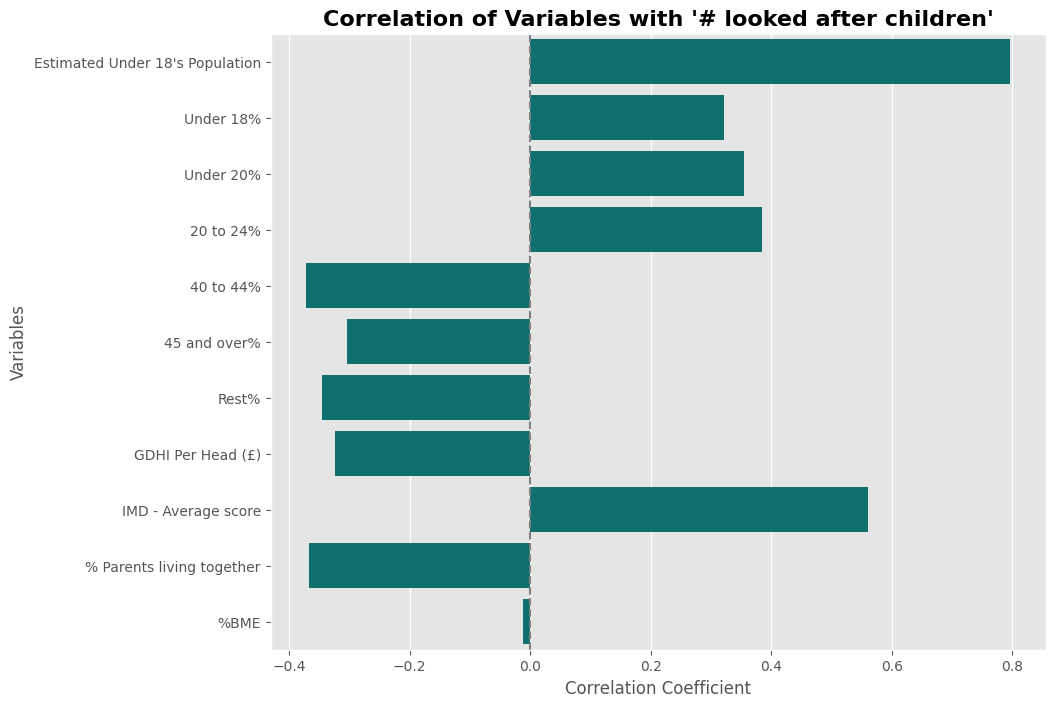

In [187]:
## Correlation

target_variable = '# looked after children'
df1 = final.drop(columns=['LA Code', 'LA Name'])
correlations = df1.corr()[target_variable].drop(target_variable)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index, palette=['teal'] * len(correlations))
plt.title(f"Correlation of Variables with '{target_variable}'", fontsize=16, weight="bold")
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Variables", fontsize=12)
plt.axvline(0, color='gray', linestyle='--')
plt.show()

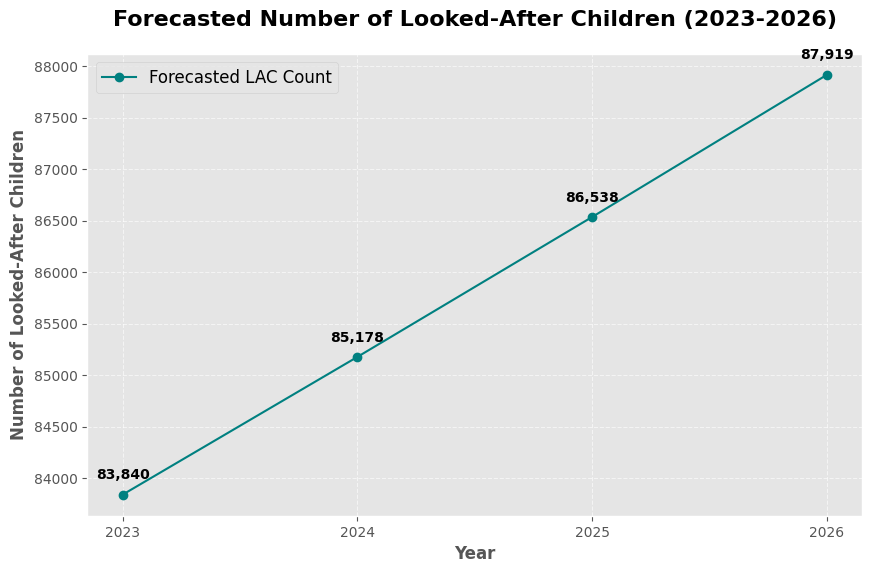

In [188]:
## Forecasting # Looked after children (2024-2026)

base_lac_count = forecast.loc[forecast['Unnamed: 1'] == "# LAC children", 2023].values[0]
cagr_lac = 0.018
cagr_population = -0.002

adjusted_cagr = (1 + cagr_lac) * (1 + cagr_population) - 1

forecast_years = [2023, 2024, 2025, 2026]
lac_forecast = [base_lac_count * ((1 + adjusted_cagr) ** (year - 2023)) for year in forecast_years]

forecast_df = pd.DataFrame({"Year": forecast_years, "Forecasted_LAC_Count": lac_forecast})


plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Year'],forecast_df['Forecasted_LAC_Count'],marker='o',color='teal',label='Forecasted LAC Count')

for year, value in zip(forecast_df['Year'], forecast_df['Forecasted_LAC_Count']):
    plt.text(year, value + 150, f"{int(value):,}", fontsize=10, weight='bold', ha='center', va='baseline', color='black')


plt.title("Forecasted Number of Looked-After Children (2023-2026)", fontsize=16, weight="bold", pad = 20)
plt.xlabel("Year", fontsize=12, weight = 'bold')
plt.ylabel("Number of Looked-After Children", fontsize=12, weight = 'bold')
plt.xticks(forecast_df['Year'], fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.6, linestyle='--')
plt.legend(fontsize=12)
plt.show()